In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#reorganize code
#add more imports that are needed



from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [108]:
pd.set_option('display.max_columns', None)  
p = pd.read_csv("fetal_health.csv")



# Exploratory Analysis

In [109]:
p

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  \
0                                                  43.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
2121                                               25.0        
2122                                               22.0        
2123                                               20.0        
2124                                               27.0        
2125                                               36.0        

      mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                     2.4             64.0           62.0   
1                                    10.4            130.0           68.0   
2                                    13.4            130.0           68.0   
3                                    23.0            117.0           53.0   
4                                    19.9            

In [110]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [111]:
p.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

### Data Cleansing/Wrangling

In [112]:
p.isnull().sum()
p.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [113]:
p.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [114]:
# for zeros in data; we dont need to use this because our data needs the zero inputs. Zeros are proper measurements.

#p.accelerations == 0
#p.accelerations == 0
#p.fetal_movement == 0

In [115]:
#sns.countplot(data= p, x="fetal_health")
p['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

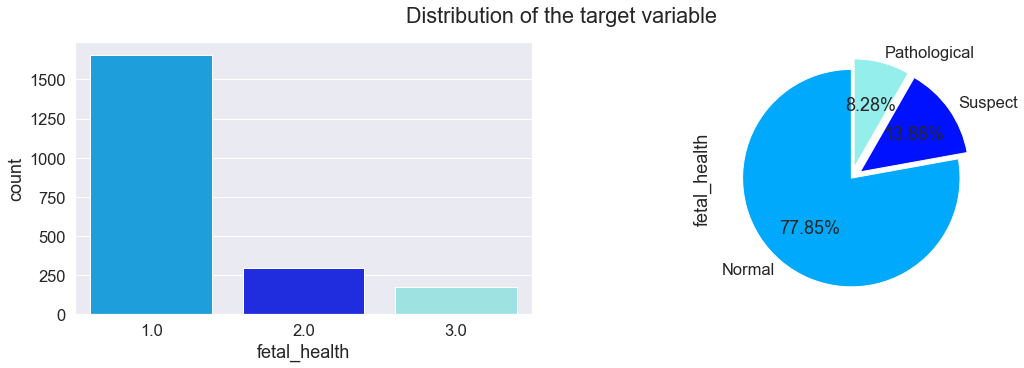

In [116]:

#maybe put the count in the graph instead? but this show that there is a heavy unbalance in the data; so we will do unsampling to balance everything out. 
#maybe change names of the classifications? Do this somewhere along this report

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(x=p['fetal_health'], palette=["#00a9fb","#0011ff", "#93eeec"])
plt.subplot(1,2,2)
p['fetal_health'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0,0.1,0.1], 
                                       startangle=90, colors=["#00a9fb","#0011ff", "#93eeec"],
                                      labels = ['Normal','Suspect','Pathological'])
plt.suptitle('Distribution of the target variable')
plt.show()

<AxesSubplot:>

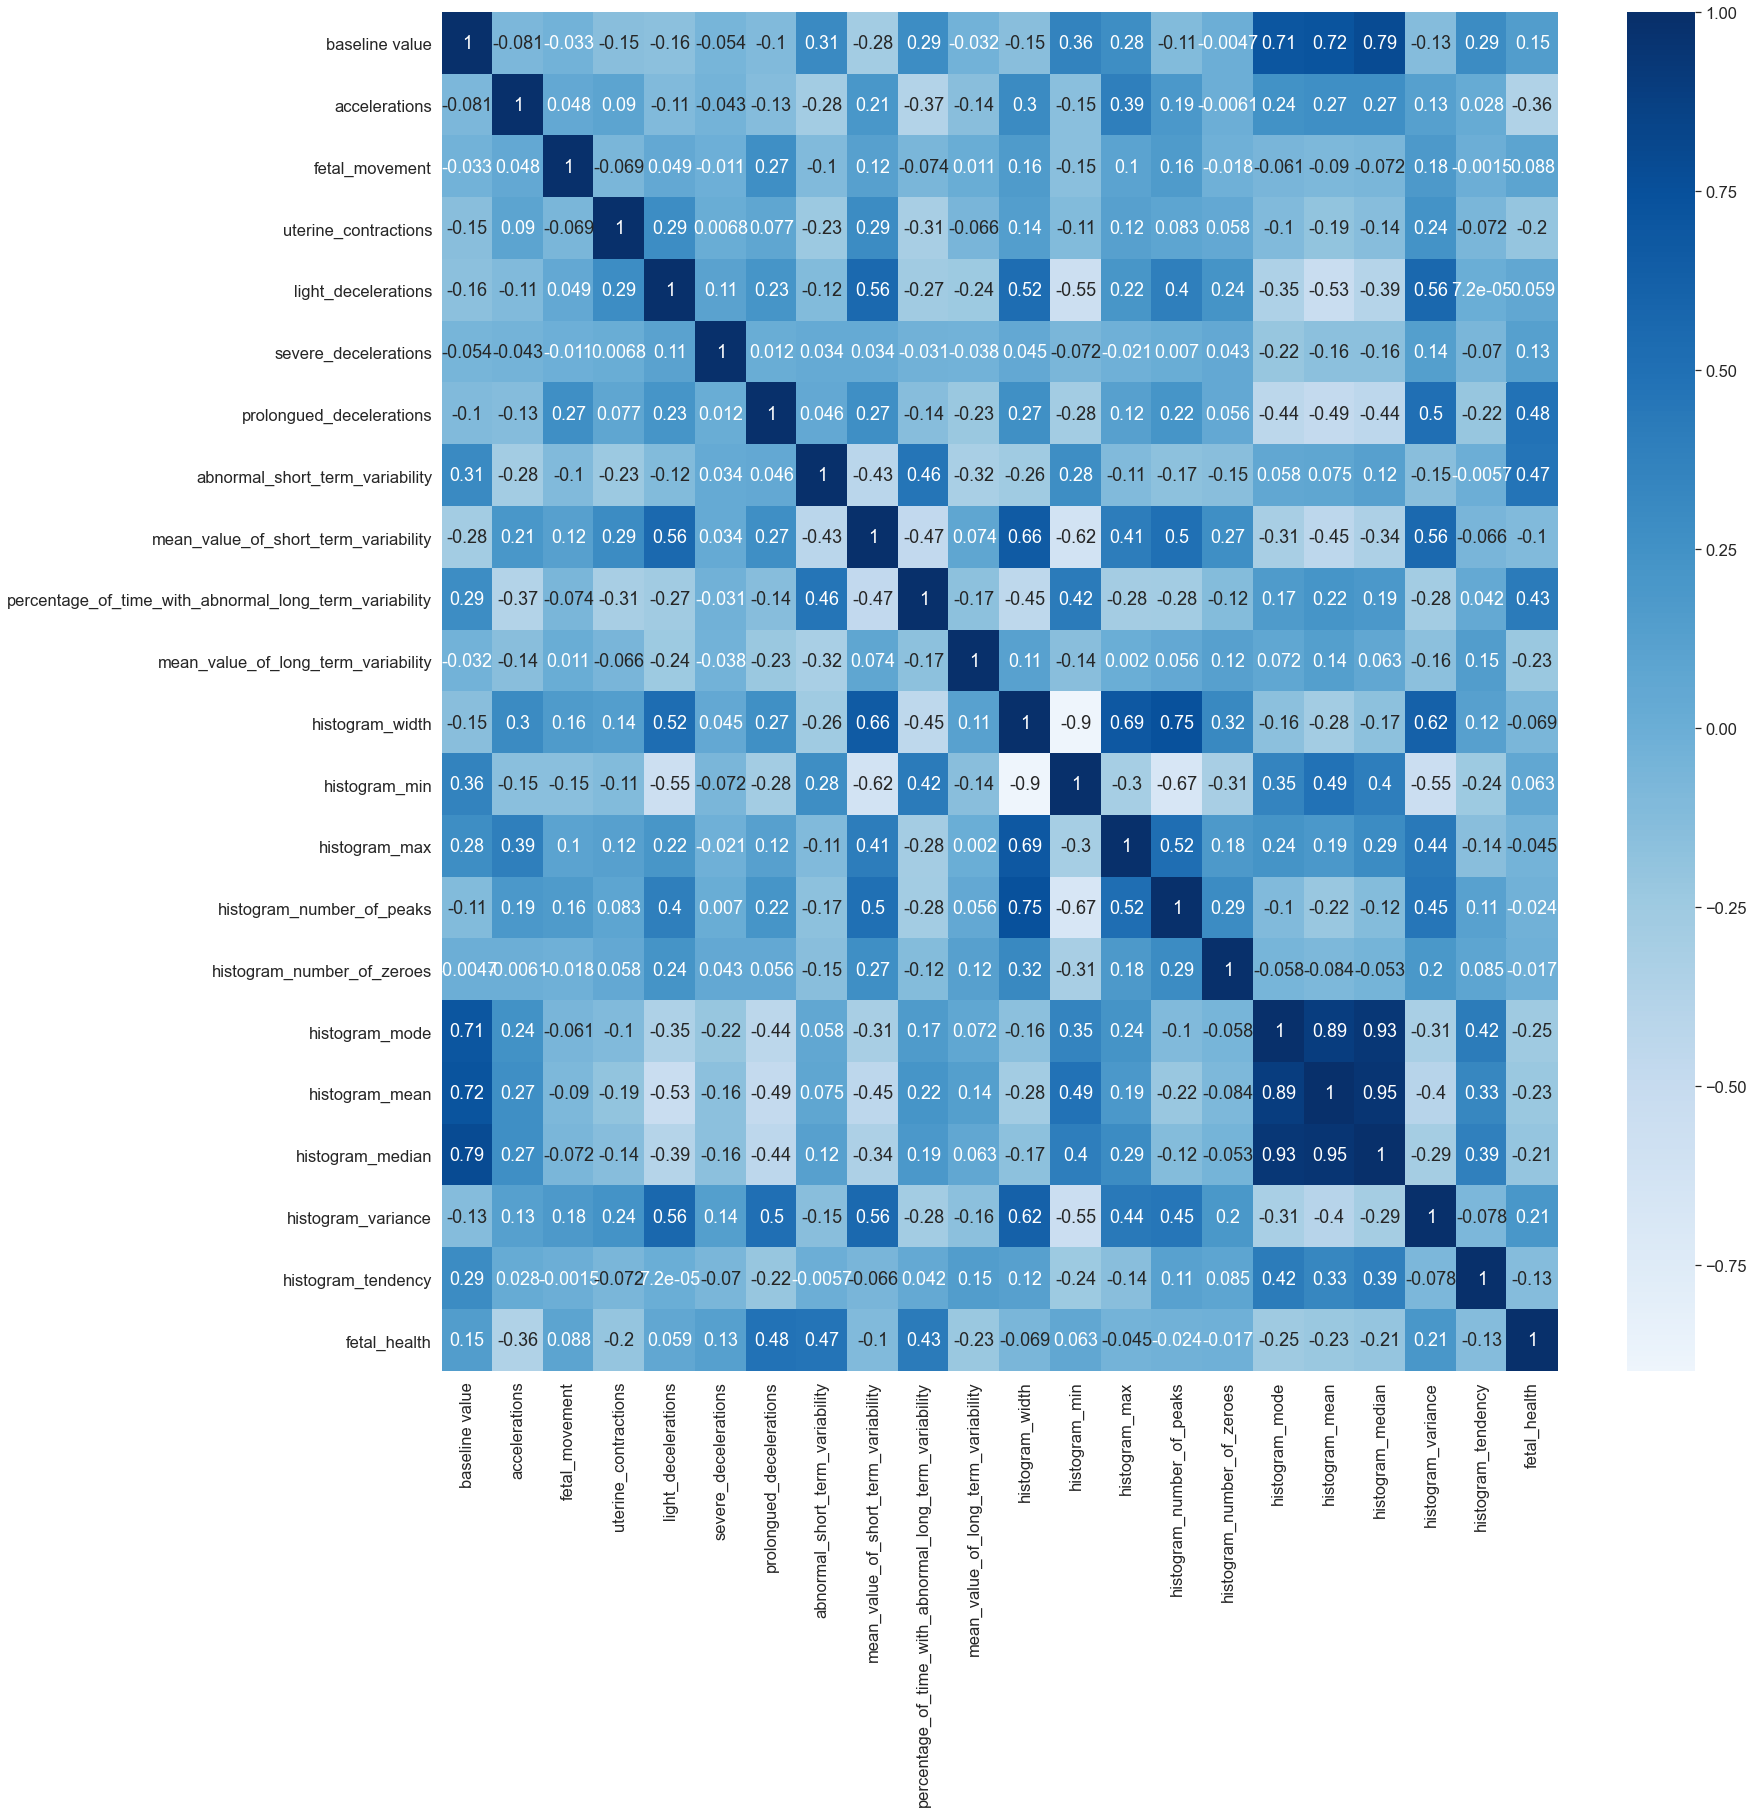

In [117]:
#correlation matrix
corrmat= p.corr()
plt.figure(figsize=(25,25))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap="Blues", center=0)

#highest correlations to (p) fetal health - 

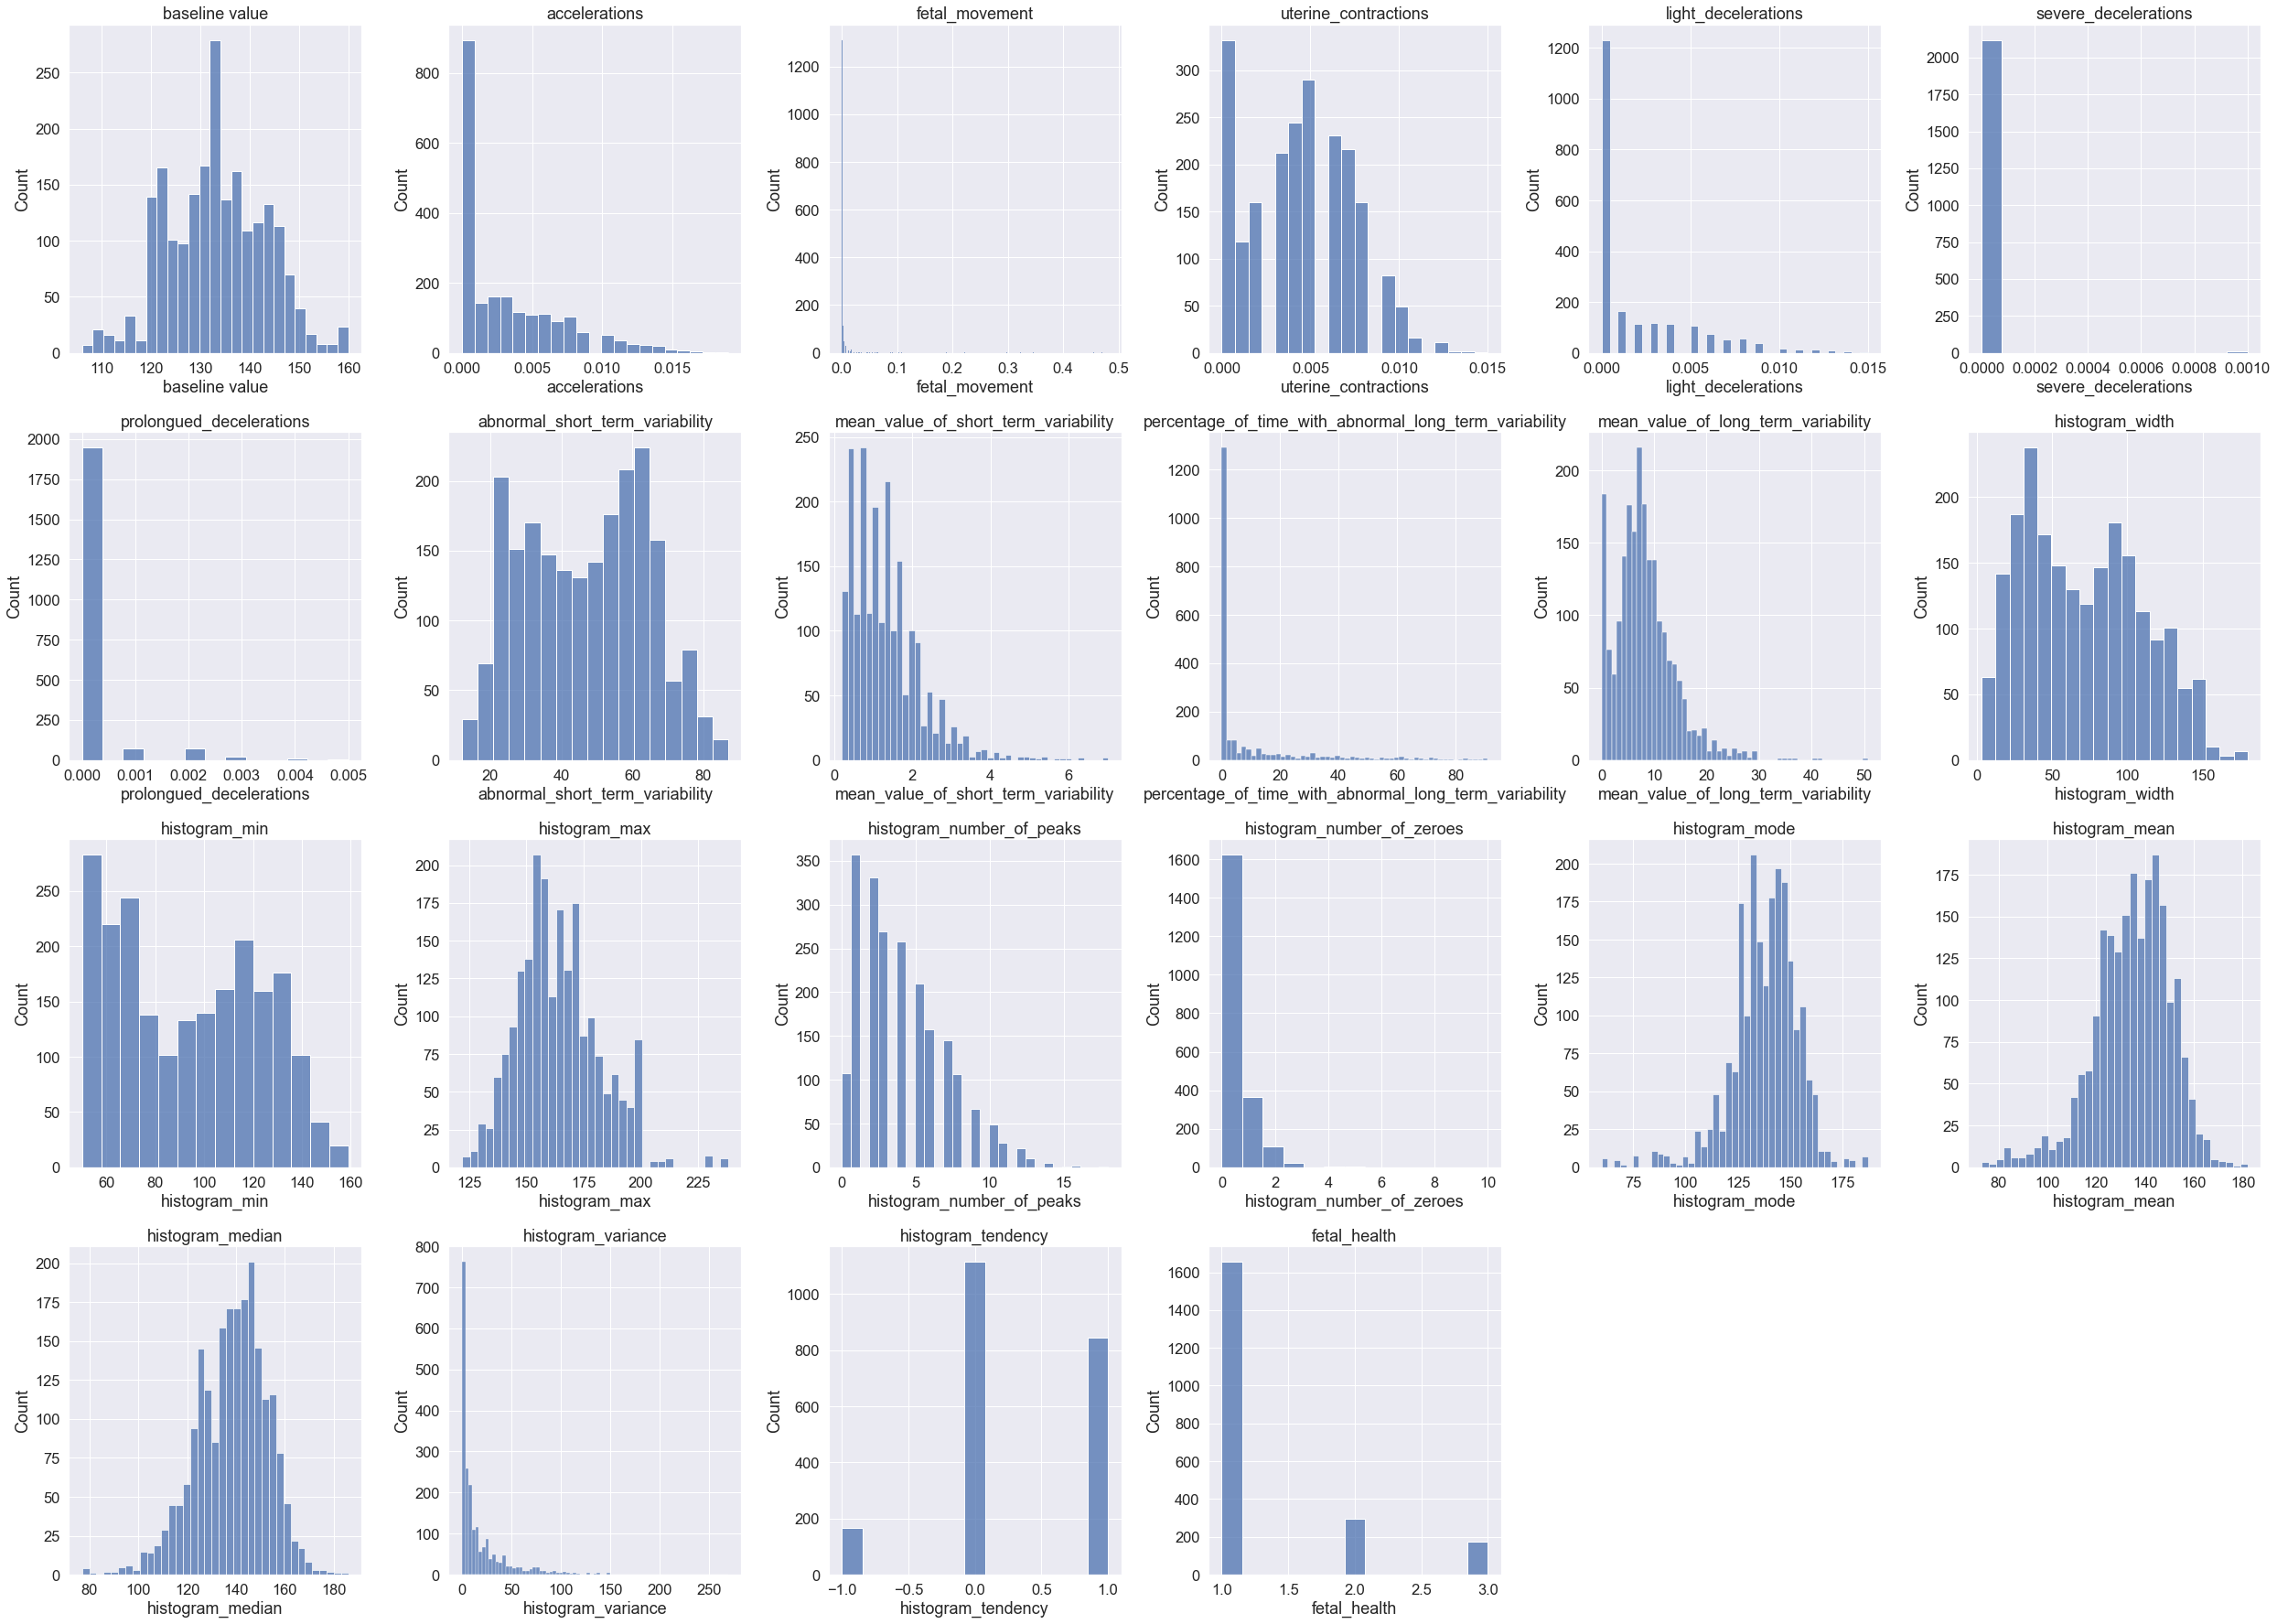

In [118]:
plt.figure(figsize=(35, 25))

for i, column in enumerate(p.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=p[column])
    plt.title(column)

plt.tight_layout()
plt.show()

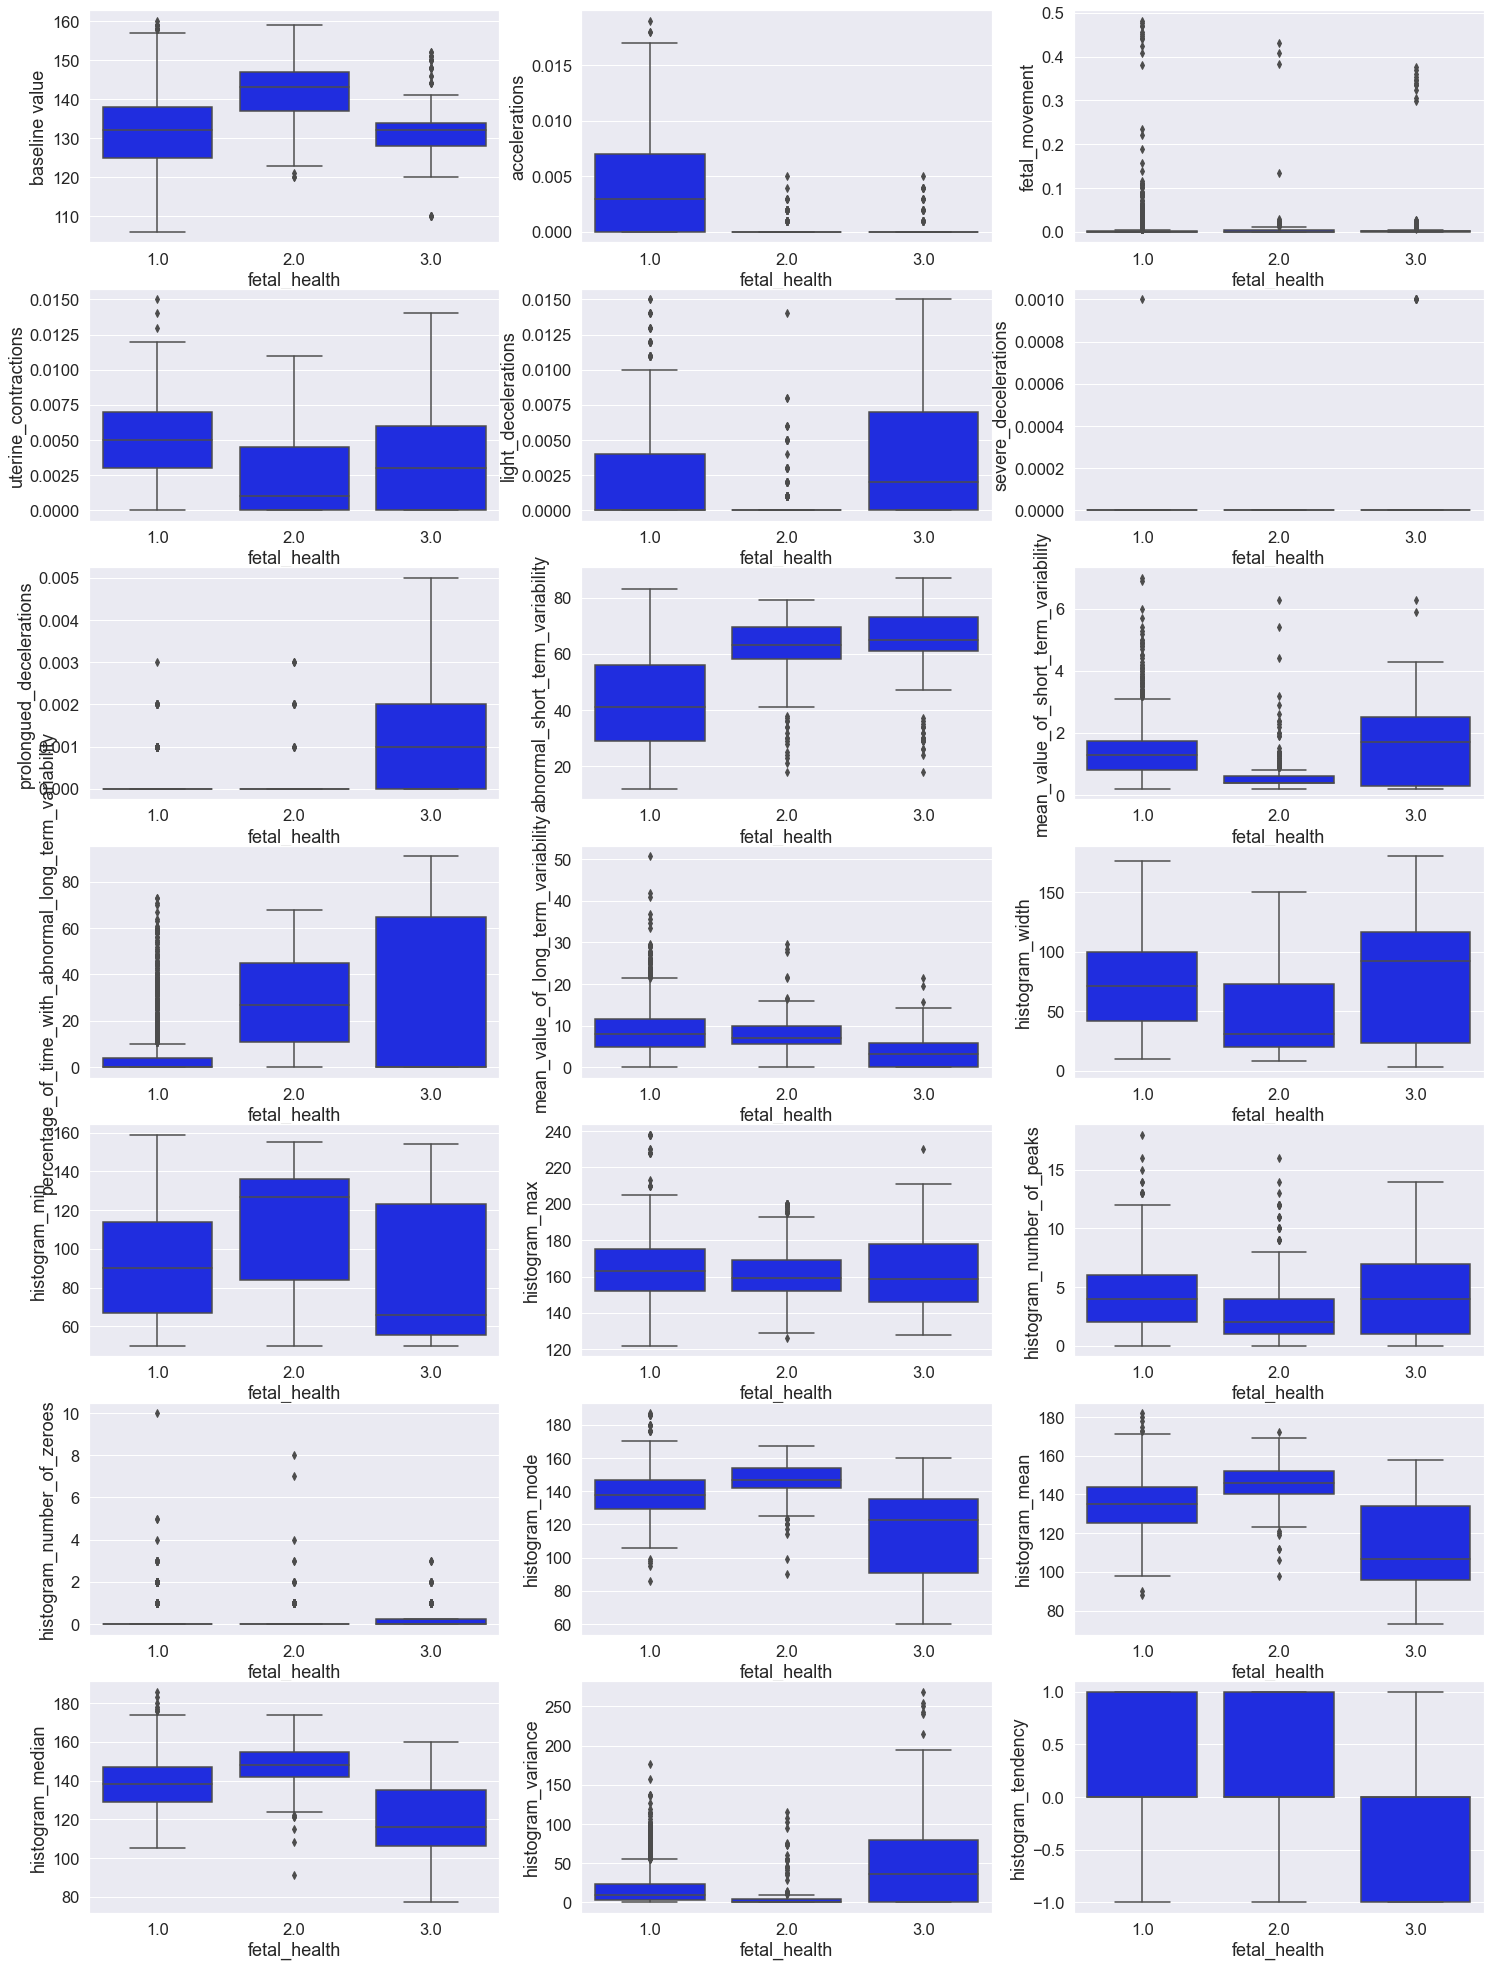

In [126]:
plt.figure(figsize=(25,35))
#sns.set(font_scale=1.5)
#sns.boxenplot(data=p, x="fetal_health", y="accelerations")
#plt.title('Accelerations in Baseline FHR wrt the fetal health categories', fontsize=20)
#plt.xlabel('Fealt Health Categories', fontsize=15)
#plt.ylabel('Accelerations in Baseline FHR', fontsize=15);

#outliers of predictors versus fetal health
for i,col in enumerate(p.columns[:-1]):
    plt.subplot(7,3,i+1)
    sns.boxplot(data=p, x='fetal_health', y=p[col], color='#0011ff')

In [48]:
p['accelerations'].value_counts()


0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

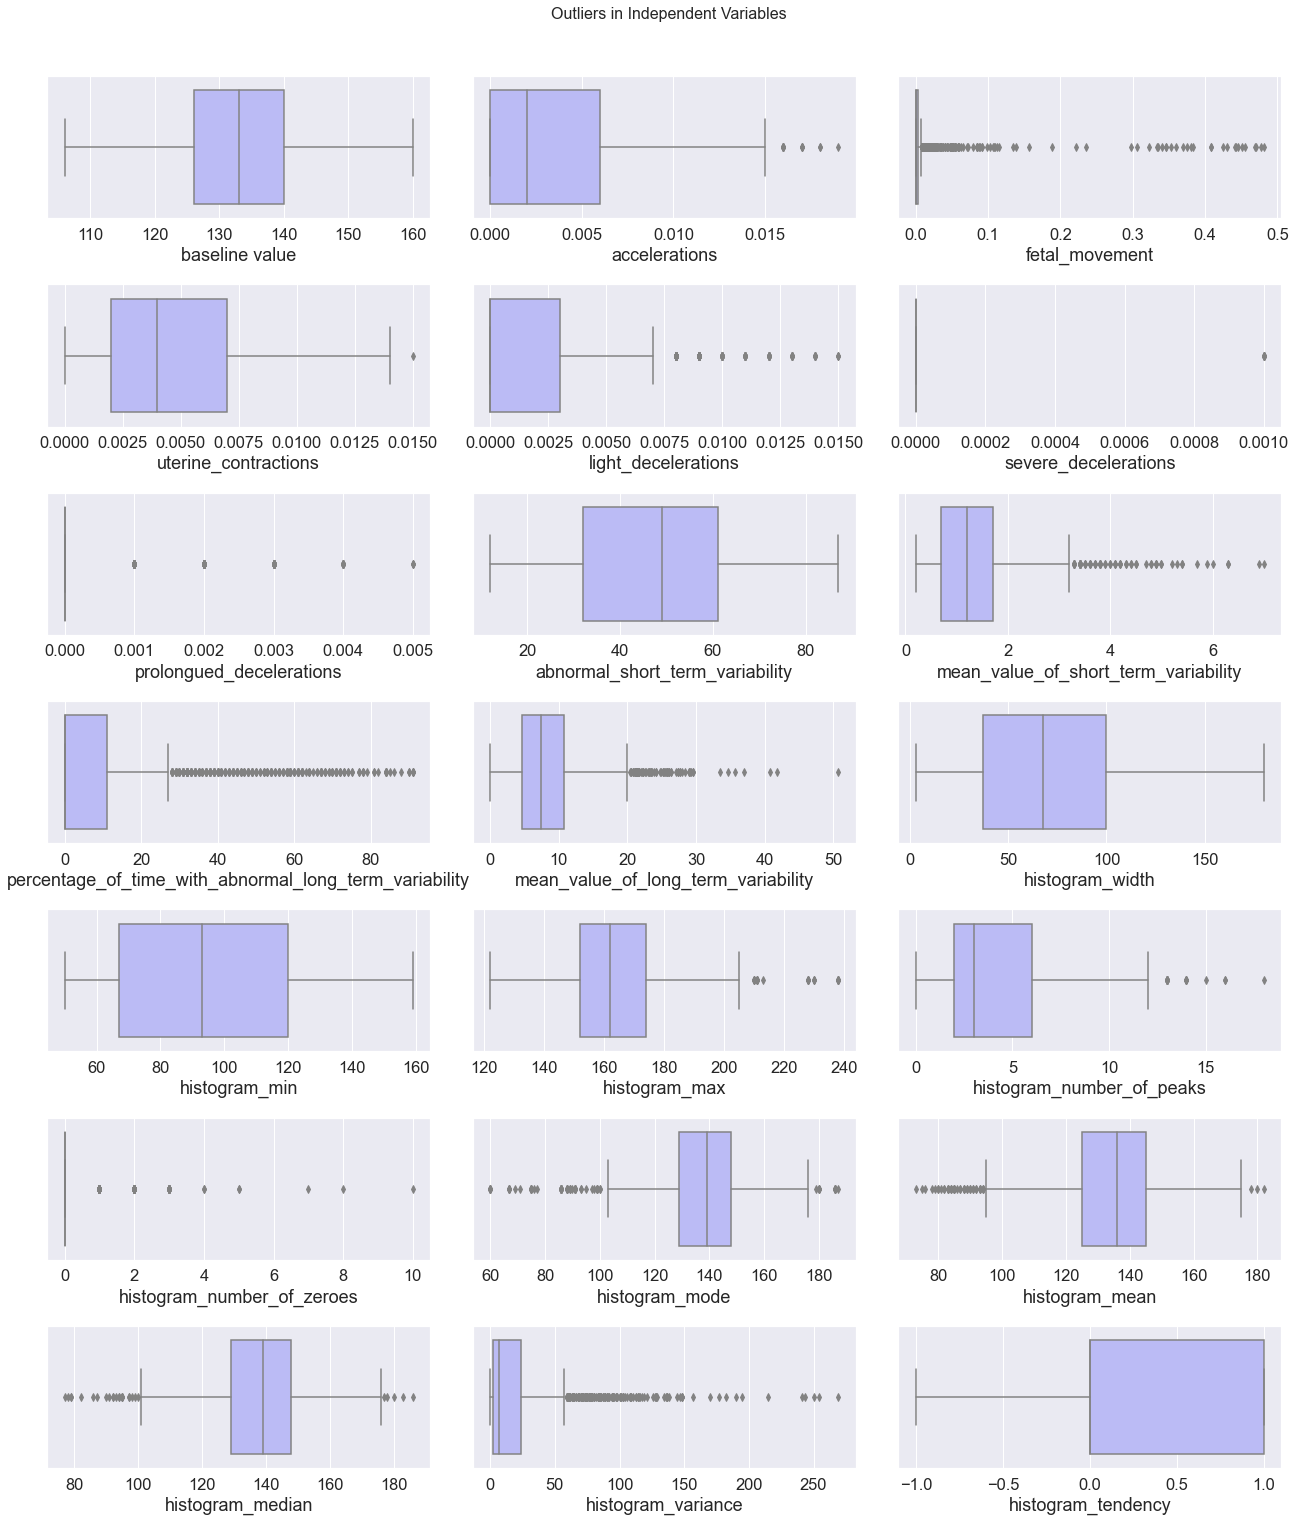

In [49]:
plt.figure(figsize=(18,21))
for i,col in enumerate(p.columns[:-1]):
    plt.subplot(7,3,i+1)
    sns.boxplot(x=p[col], color='#b1b1ff')
plt.suptitle('Outliers in Independent Variables', size=16, y=1.01)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Fetal count')

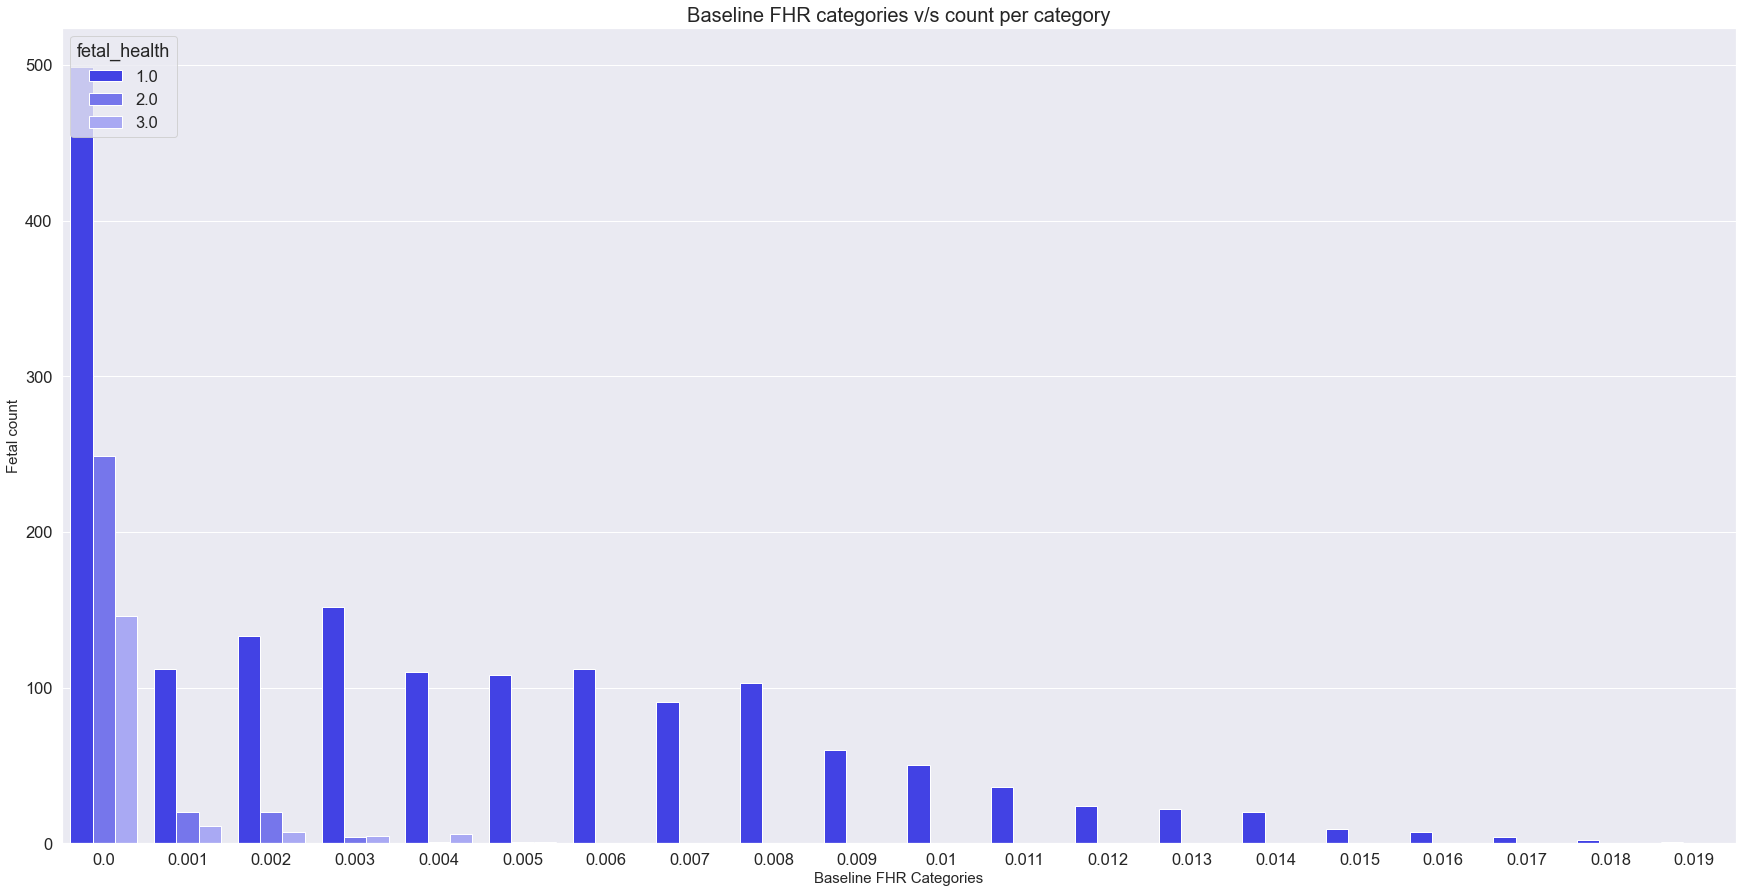

In [50]:
accel_rounded = p['accelerations']=p.accelerations.round(3)

plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.countplot(data=p, x=accel_rounded, hue='fetal_health',palette=['#2727ff','#6262ff','#9d9dff'])
plt.title('Baseline FHR categories v/s count per category', fontsize=20)
plt.xlabel('Baseline FHR Categories', fontsize=15)
plt.ylabel('Fetal count', fontsize=15)

Text(0, 0.5, 'Fetal count')

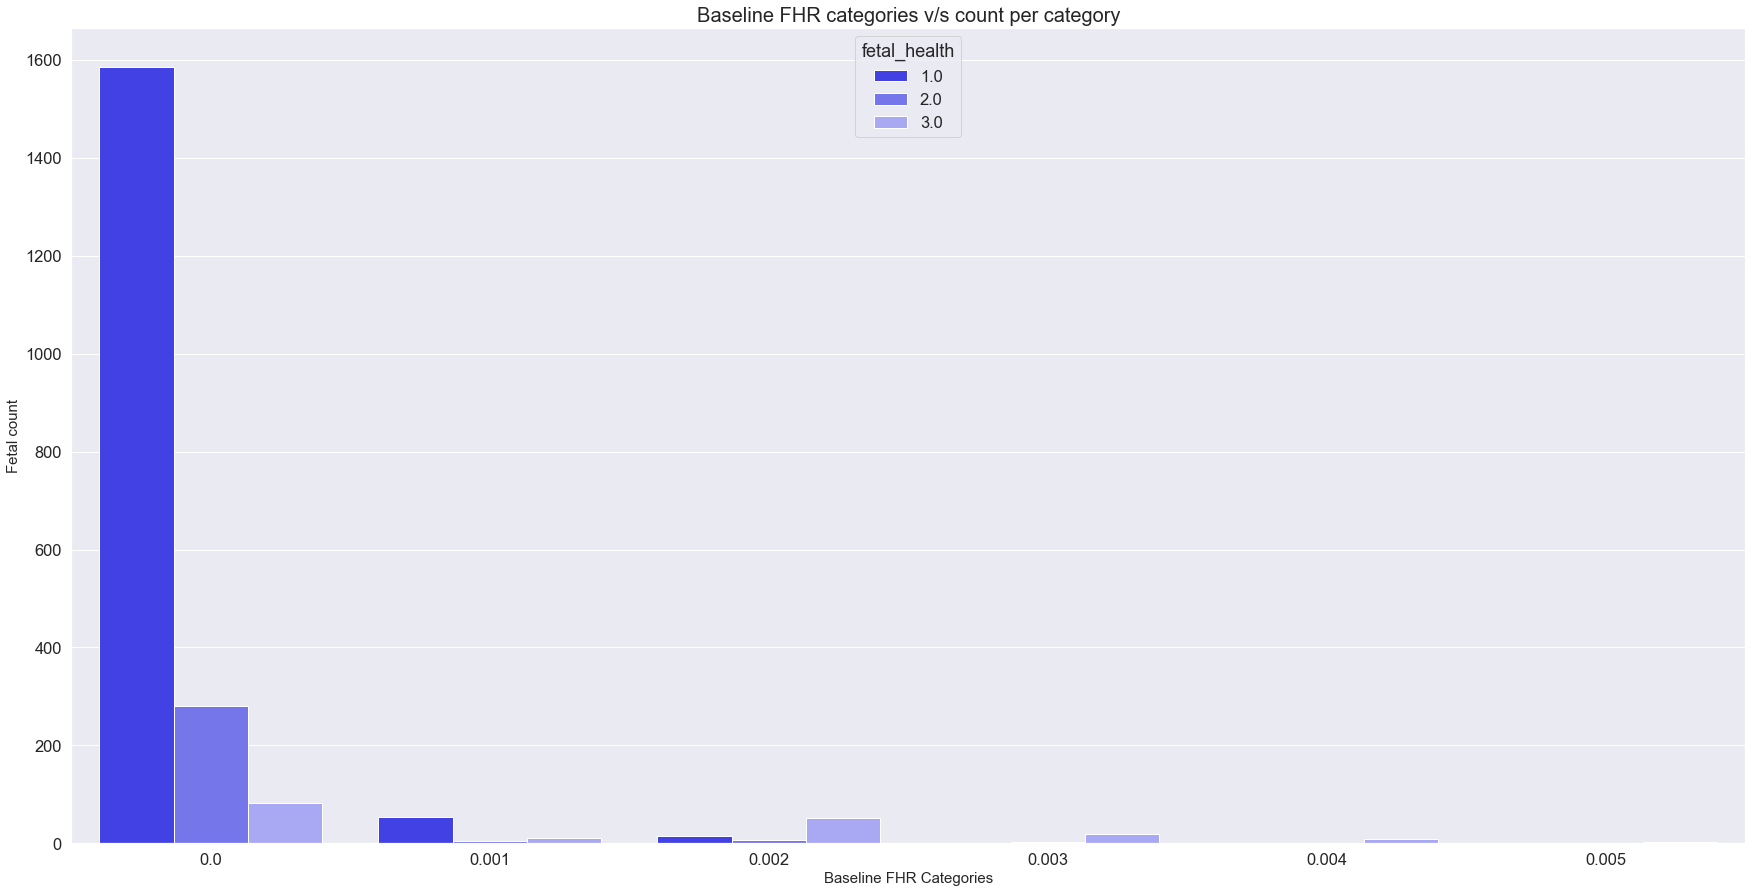

In [51]:
pro_dece_rounded = p['prolongued_decelerations']=p.prolongued_decelerations.round(3)

plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.countplot(data=p, x=pro_dece_rounded, hue='fetal_health',palette=['#2727ff','#6262ff','#9d9dff'])
plt.title('Baseline FHR categories v/s count per category', fontsize=20)
plt.xlabel('Baseline FHR Categories', fontsize=15)
plt.ylabel('Fetal count', fontsize=15)

Text(0, 0.5, 'Fetal count')

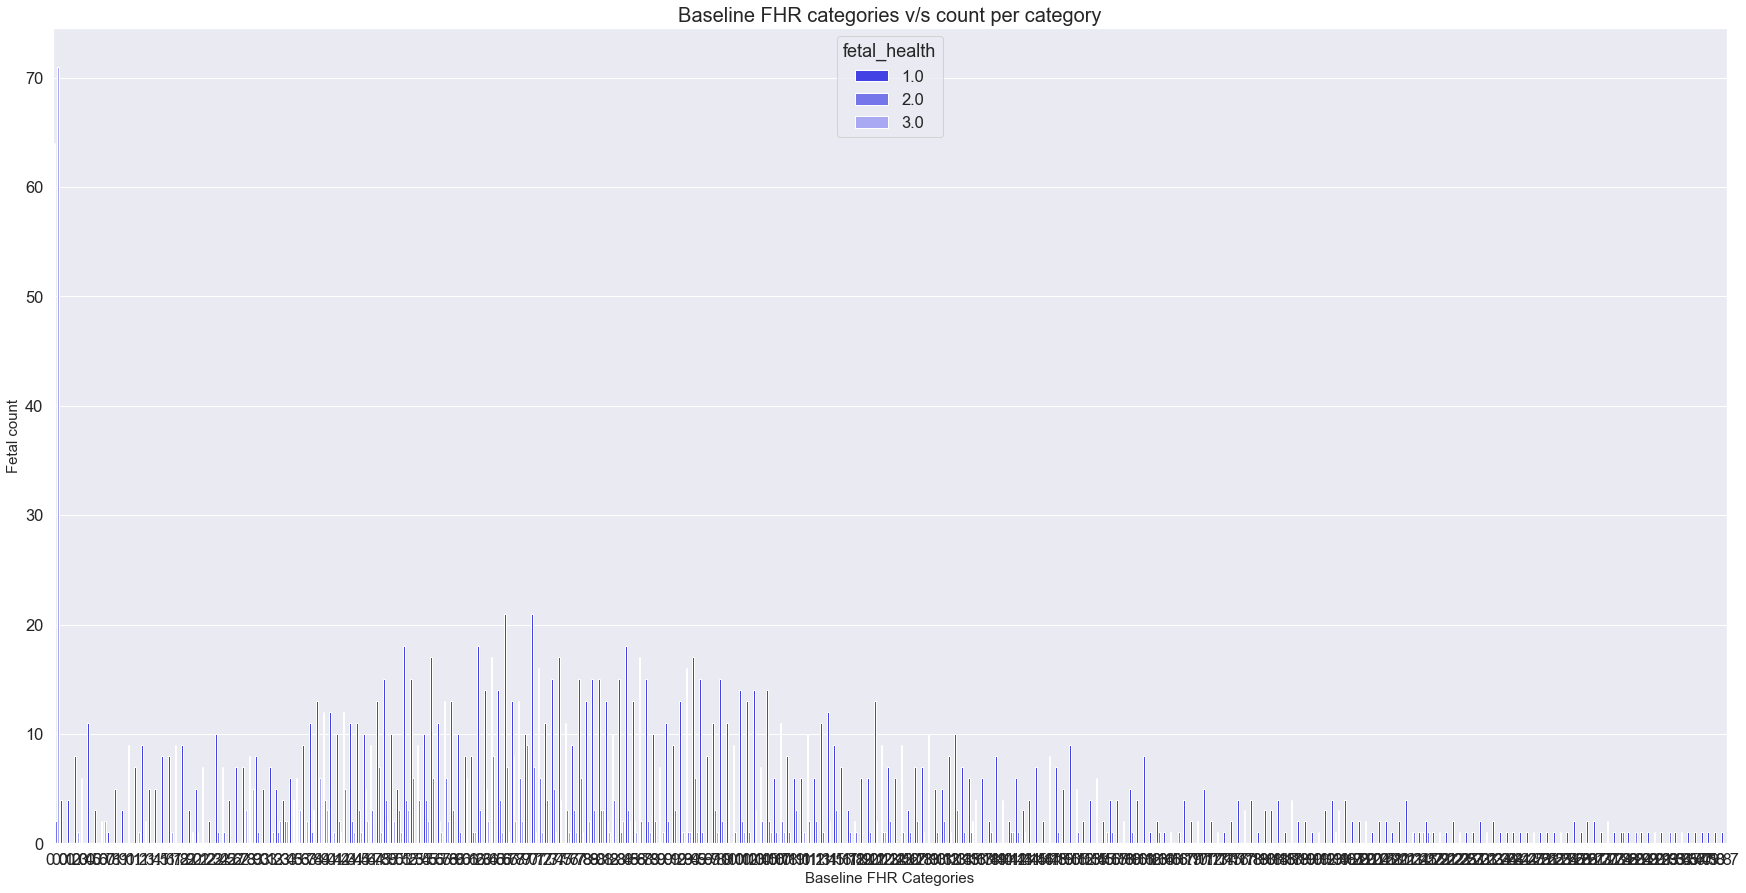

In [52]:
#mean_val_rounded = p['mean_value_of_long_term_variability']=p.mean_value_of_long_term_variability.round(3)

#plt.figure(figsize=(30,15))
#sns.set(font_scale=1.5)
#sns.countplot(data=p, x=mean_val_rounded, hue='fetal_health',palette=['#2727ff','#6262ff','#9d9dff'])
#plt.title('Baseline FHR categories v/s count per category', fontsize=20)
#plt.xlabel('Baseline FHR Categories', fontsize=15)
#plt.ylabel('Fetal count', fontsize=15)

### Upsampling

In [53]:
#because there is such an imbalance - explain why imbalance isnt good and we should definitely do something about this in report

# Separate majority and minority classes
highclass_1 = p[p.fetal_health==1]
lowclass_2 = p[p.fetal_health==2]
lowclass_3 = p[p.fetal_health==3]

# Upsample minority class 
lowclass2_upsampled = lowclass_2.sample(len(highclass_1),
                                      replace=True,
                                      random_state=123)


lowclass3_upsampled = lowclass_3.sample(len(highclass_1),
                                        replace=True,
                                        random_state=123)

# Combine majority class with upsampled minority class
p_upsampled = pd.concat([highclass_1, lowclass2_upsampled, lowclass3_upsampled])

# Display new class counts
p_upsampled['fetal_health'].value_counts()
#p_upsampled.fetal_health.value_counts()

3.0    1655
2.0    1655
1.0    1655
Name: fetal_health, dtype: int64

In [54]:
p_upsampled

baseline value  accelerations  fetal_movement  uterine_contractions  \
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
12             131.0          0.005           0.072                 0.008   
...              ...            ...             ...                   ...   
1348           128.0          0.000           0.025                 0.003   
597            148.0          0.000           0.003                 0.005   
1681           110.0          0.003           0.002                 0.006   
7              122.0          0.000           0.000                 0.000   
472            150.0          0.000           0.000                 0.001   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1                   0.003                   0.0                     0.000   
2                   0.003                   0.0                     0.000   
3                   0.003                   0.0                     0.000   
4                   0.000                   0.0                     0.000   
12                  0.003                   0.0                     0.000   
...                   ...                   ...                       ...   
1348                0.003                   0.0                     0.003   
597                 0.000                   0.0                     0.000   
1681                0.007                   0.0                     0.002   
7                   0.000                   0.0                     0.000   
472                 0.000                   0.0                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
12                               28.0                                   1.4   
...                               ...                                   ...   
1348                             34.0                                   2.4   
597                              77.0                                   0.5   
1681                             68.0                                   3.1   
7                                83.0                                   0.5   
472                              81.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  \
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
12                                                  0.0        
...                                                 ...        
1348                                                0.0        
597                                                 4.0        
1681                                                0.0        
7                                                   6.0        
472                                                17.0        

      mean_value_of_long_term_variability  histogram_width  histogram_min  \
1                                    10.4            130.0           68.0   
2                                    13.4            130.0           68.0   
3                                    23.0            117.0           53.0   
4                                    19.9            117.0           53.0   
12                                   12.9            

In [55]:
p_upsampled.describe().T

count        mean  \
baseline value                                      4965.0  135.084391   
accelerations                                       4965.0    0.001547   
fetal_movement                                      4965.0    0.013575   
uterine_contractions                                4965.0    0.003666   
light_decelerations                                 4965.0    0.002091   
severe_decelerations                                4965.0    0.000012   
prolongued_decelerations                            4965.0    0.000481   
abnormal_short_term_variability                     4965.0   56.444713   
mean_value_of_short_term_variability                4965.0    1.218348   
percentage_of_time_with_abnormal_long_term_vari...  4965.0   18.849748   
mean_value_of_long_term_variability                 4965.0    6.762558   
histogram_width                                     4965.0   67.379456   
histogram_min                                       4965.0   95.710775   
histogram_max                                       4965.0  163.090232   
histogram_number_of_peaks                           4965.0    3.942397   
histogram_number_of_zeroes                          4965.0    0.309970   
histogram_mode                                      4965.0  132.861229   
histogram_mean                                      4965.0  130.792346   
histogram_median                                    4965.0  134.754683   
histogram_variance                                  4965.0   25.750655   
histogram_tendency                                  4965.0    0.232226   
fetal_health                                        4965.0    2.000000   

                                                          std    min    25%  \
baseline value                                      10.075937  106.0  128.0   
accelerations                                        0.002972    0.0    0.0   
fetal_movement                                       0.059262    0.0    0.0   
uterine_contractions                                 0.003185    0.0    0.0   
light_decelerations                                  0.003326    0.0    0.0   
severe_decelerations                                 0.000109    0.0    0.0   
prolongued_decelerations                             0.001025    0.0    0.0   
abnormal_short_term_variability                     17.011254   12.0   45.0   
mean_value_of_short_term_variability                 1.004065    0.2    0.4   
percentage_of_time_with_abnormal_long_term_vari...  25.716783    0.0    0.0   
mean_value_of_long_term_variability                  5.189628    0.0    3.6   
histogram_width                                     43.703406    3.0   26.0   
histogram_min                                       33.144352   50.0   63.0   
histogram_max                                       18.710513  122.0  151.0   
histogram_number_of_peaks                            3.114764    0.0    1.0   
histogram_number_of_zeroes                           0.729260    0.0    0.0   
histogram_mode                                      22.762797   60.0  125.0   
histogram_mean                                      20.937750   73.0  120.0   
histogram_median                                    18.741784   77.0  123.0   
histogram_variance                                  43.507799    0.0    1.0   
histogram_tendency                                   0.666217   -1.0    0.0   
fetal_health                                         0.816579    1.0    1.0   

                                                        50%      75%      max  
baseline value                                      134.000  143.000  160.000  
accelerations                                         0.000    0.002    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.003    0.006    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe_decelerations                                

In [56]:
p_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4965 entries, 1 to 472
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          4965 non-null   float64
 1   accelerations                                           4965 non-null   float64
 2   fetal_movement                                          4965 non-null   float64
 3   uterine_contractions                                    4965 non-null   float64
 4   light_decelerations                                     4965 non-null   float64
 5   severe_decelerations                                    4965 non-null   float64
 6   prolongued_decelerations                                4965 non-null   float64
 7   abnormal_short_term_variability                         4965 non-null   float64
 8   mean_value_of_short_term_variability   

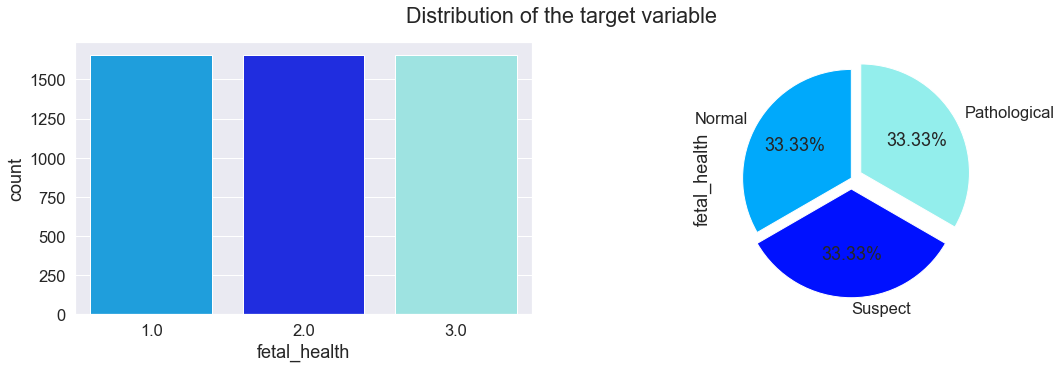

In [57]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(x=p_upsampled['fetal_health'], palette=["#00a9fb","#0011ff", "#93eeec"])
plt.subplot(1,2,2)
p_upsampled['fetal_health'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0,0.1,0.1], 
                                       startangle=90, colors=["#00a9fb","#0011ff", "#93eeec"],
                                      labels = ['Normal','Suspect','Pathological'])
plt.suptitle('Distribution of the target variable')
plt.show()

<AxesSubplot:>

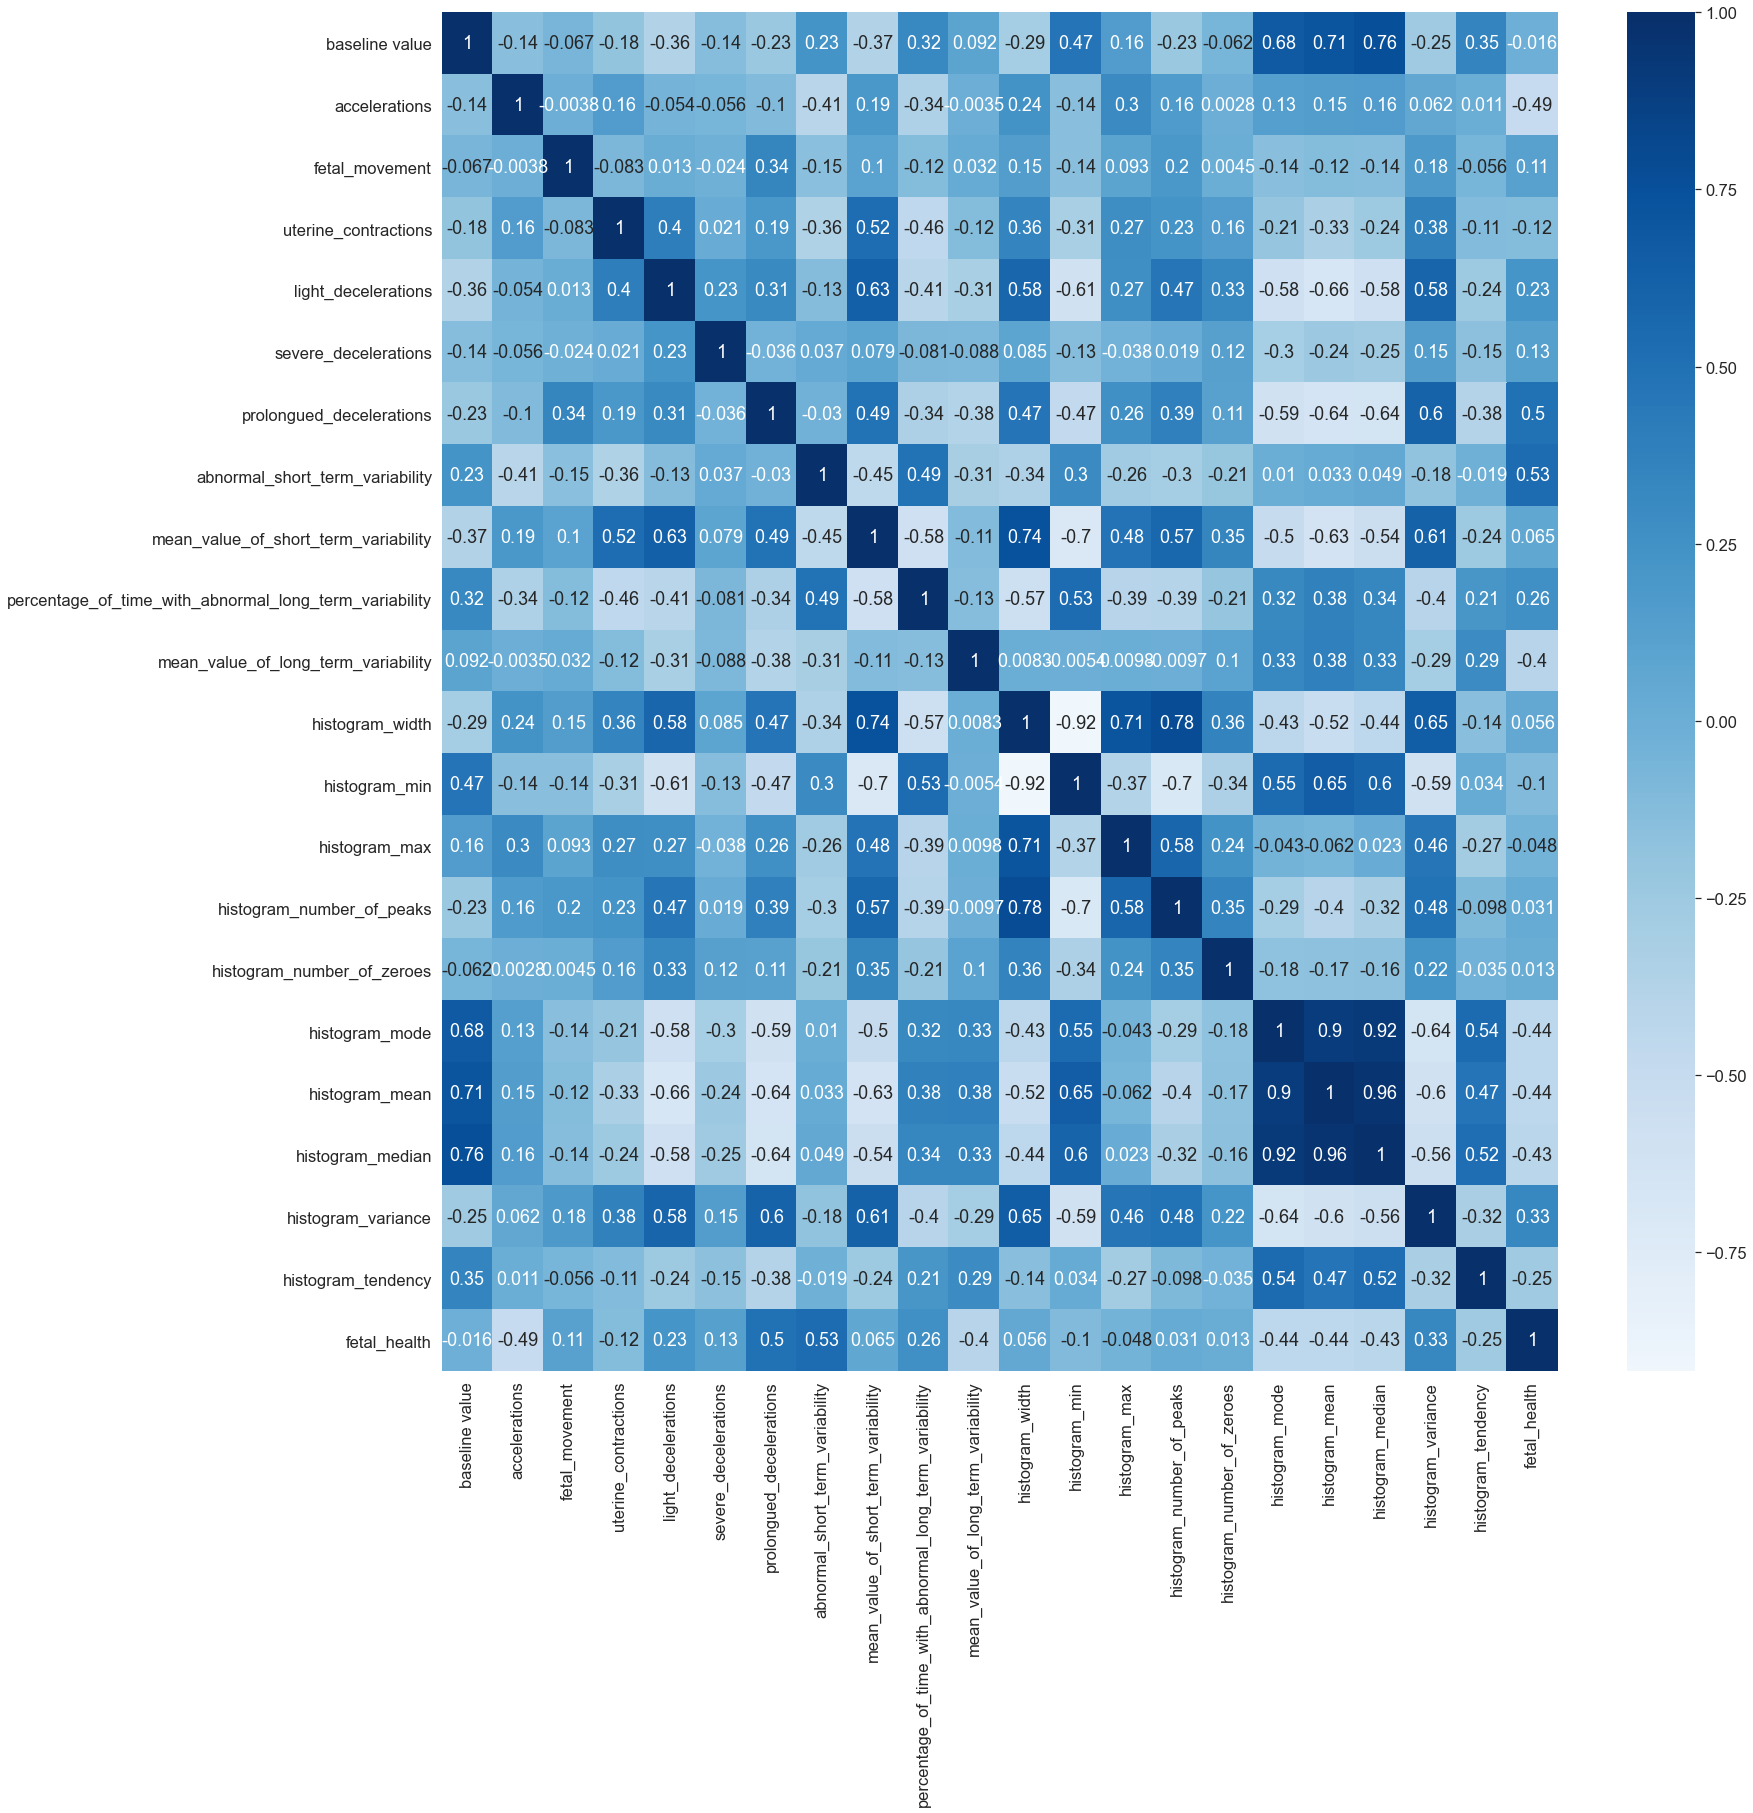

In [58]:
#correlation matrix
corrmat= p_upsampled.corr()
plt.figure(figsize=(25,25))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap="Blues", center=0)

#highest correlations to fetal health - 

C:\Users\ainaa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ainaa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


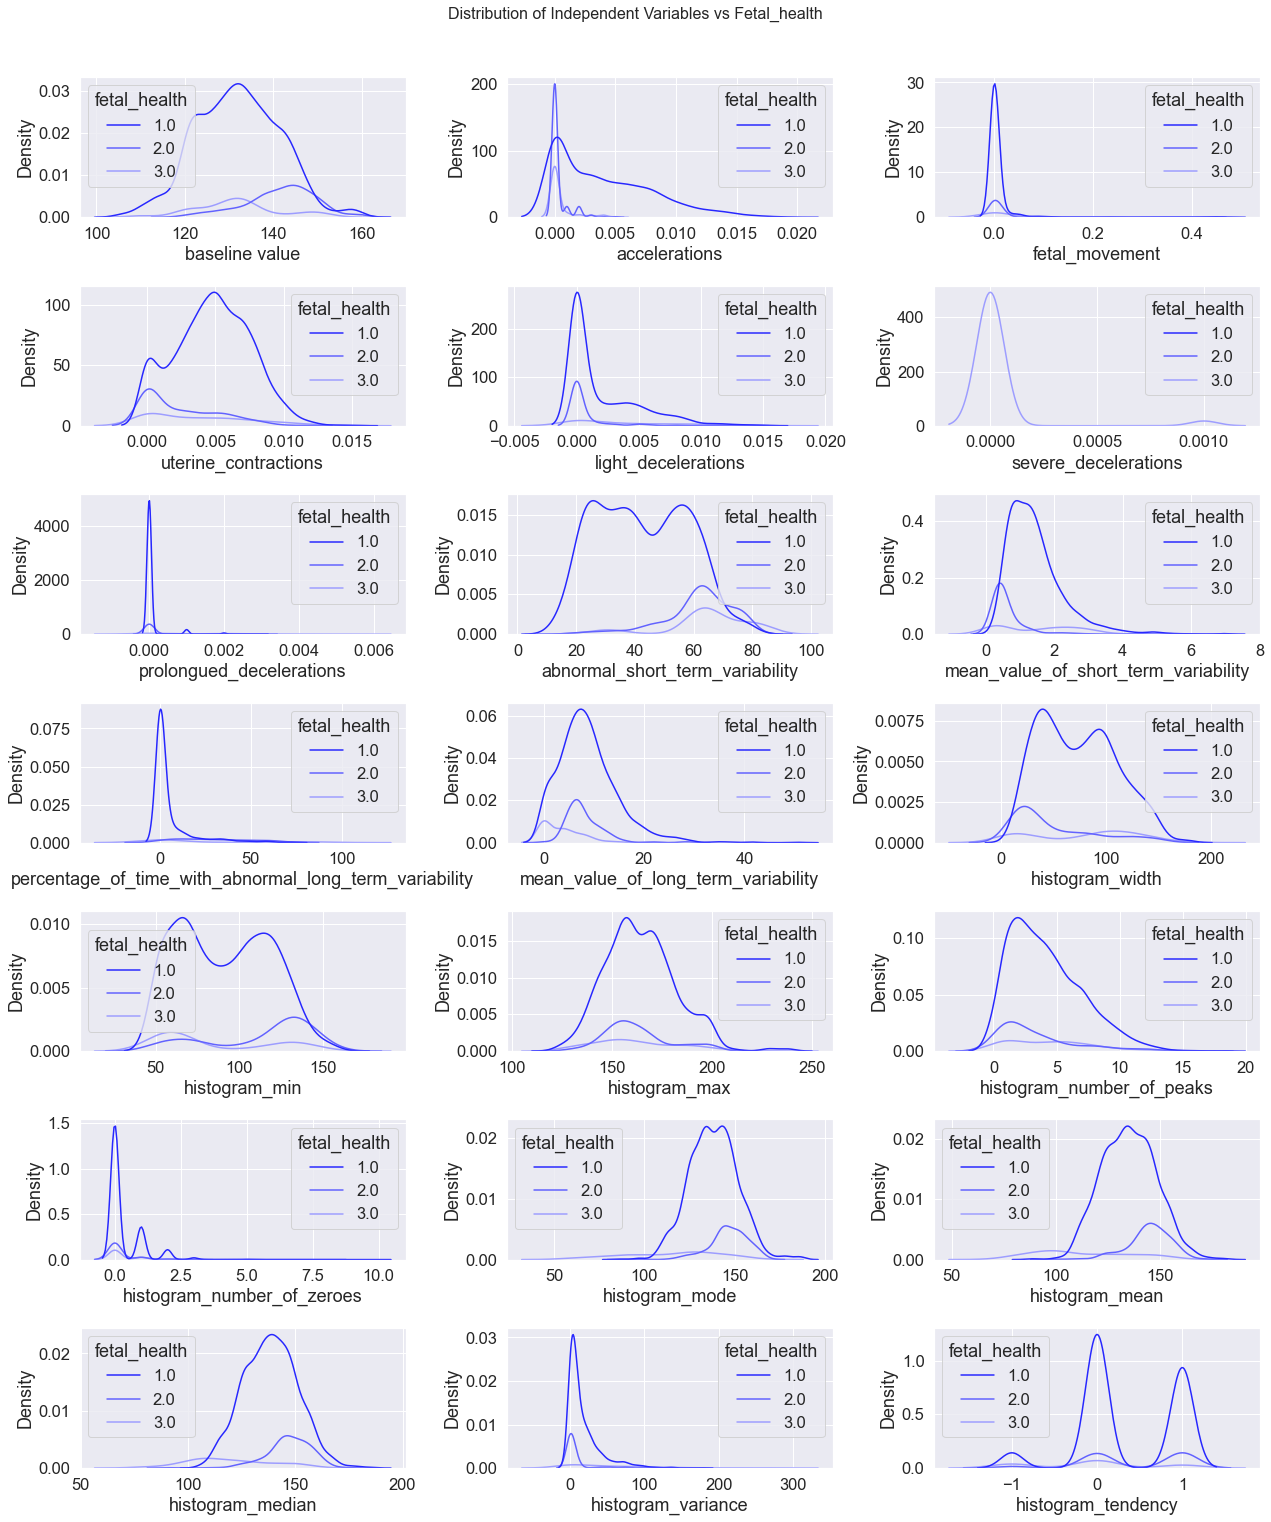

In [59]:
plt.figure(figsize=(18,21))
for i,col in enumerate(p.columns[:-1]):
    plt.subplot(7,3,i+1)
    sns.kdeplot(x=p[col],hue=p['fetal_health'],palette=['#2727ff','#6262ff','#9d9dff'])
plt.suptitle('Distribution of Independent Variables vs Fetal_health', size=16, y=1.01)
plt.tight_layout()
plt.show()

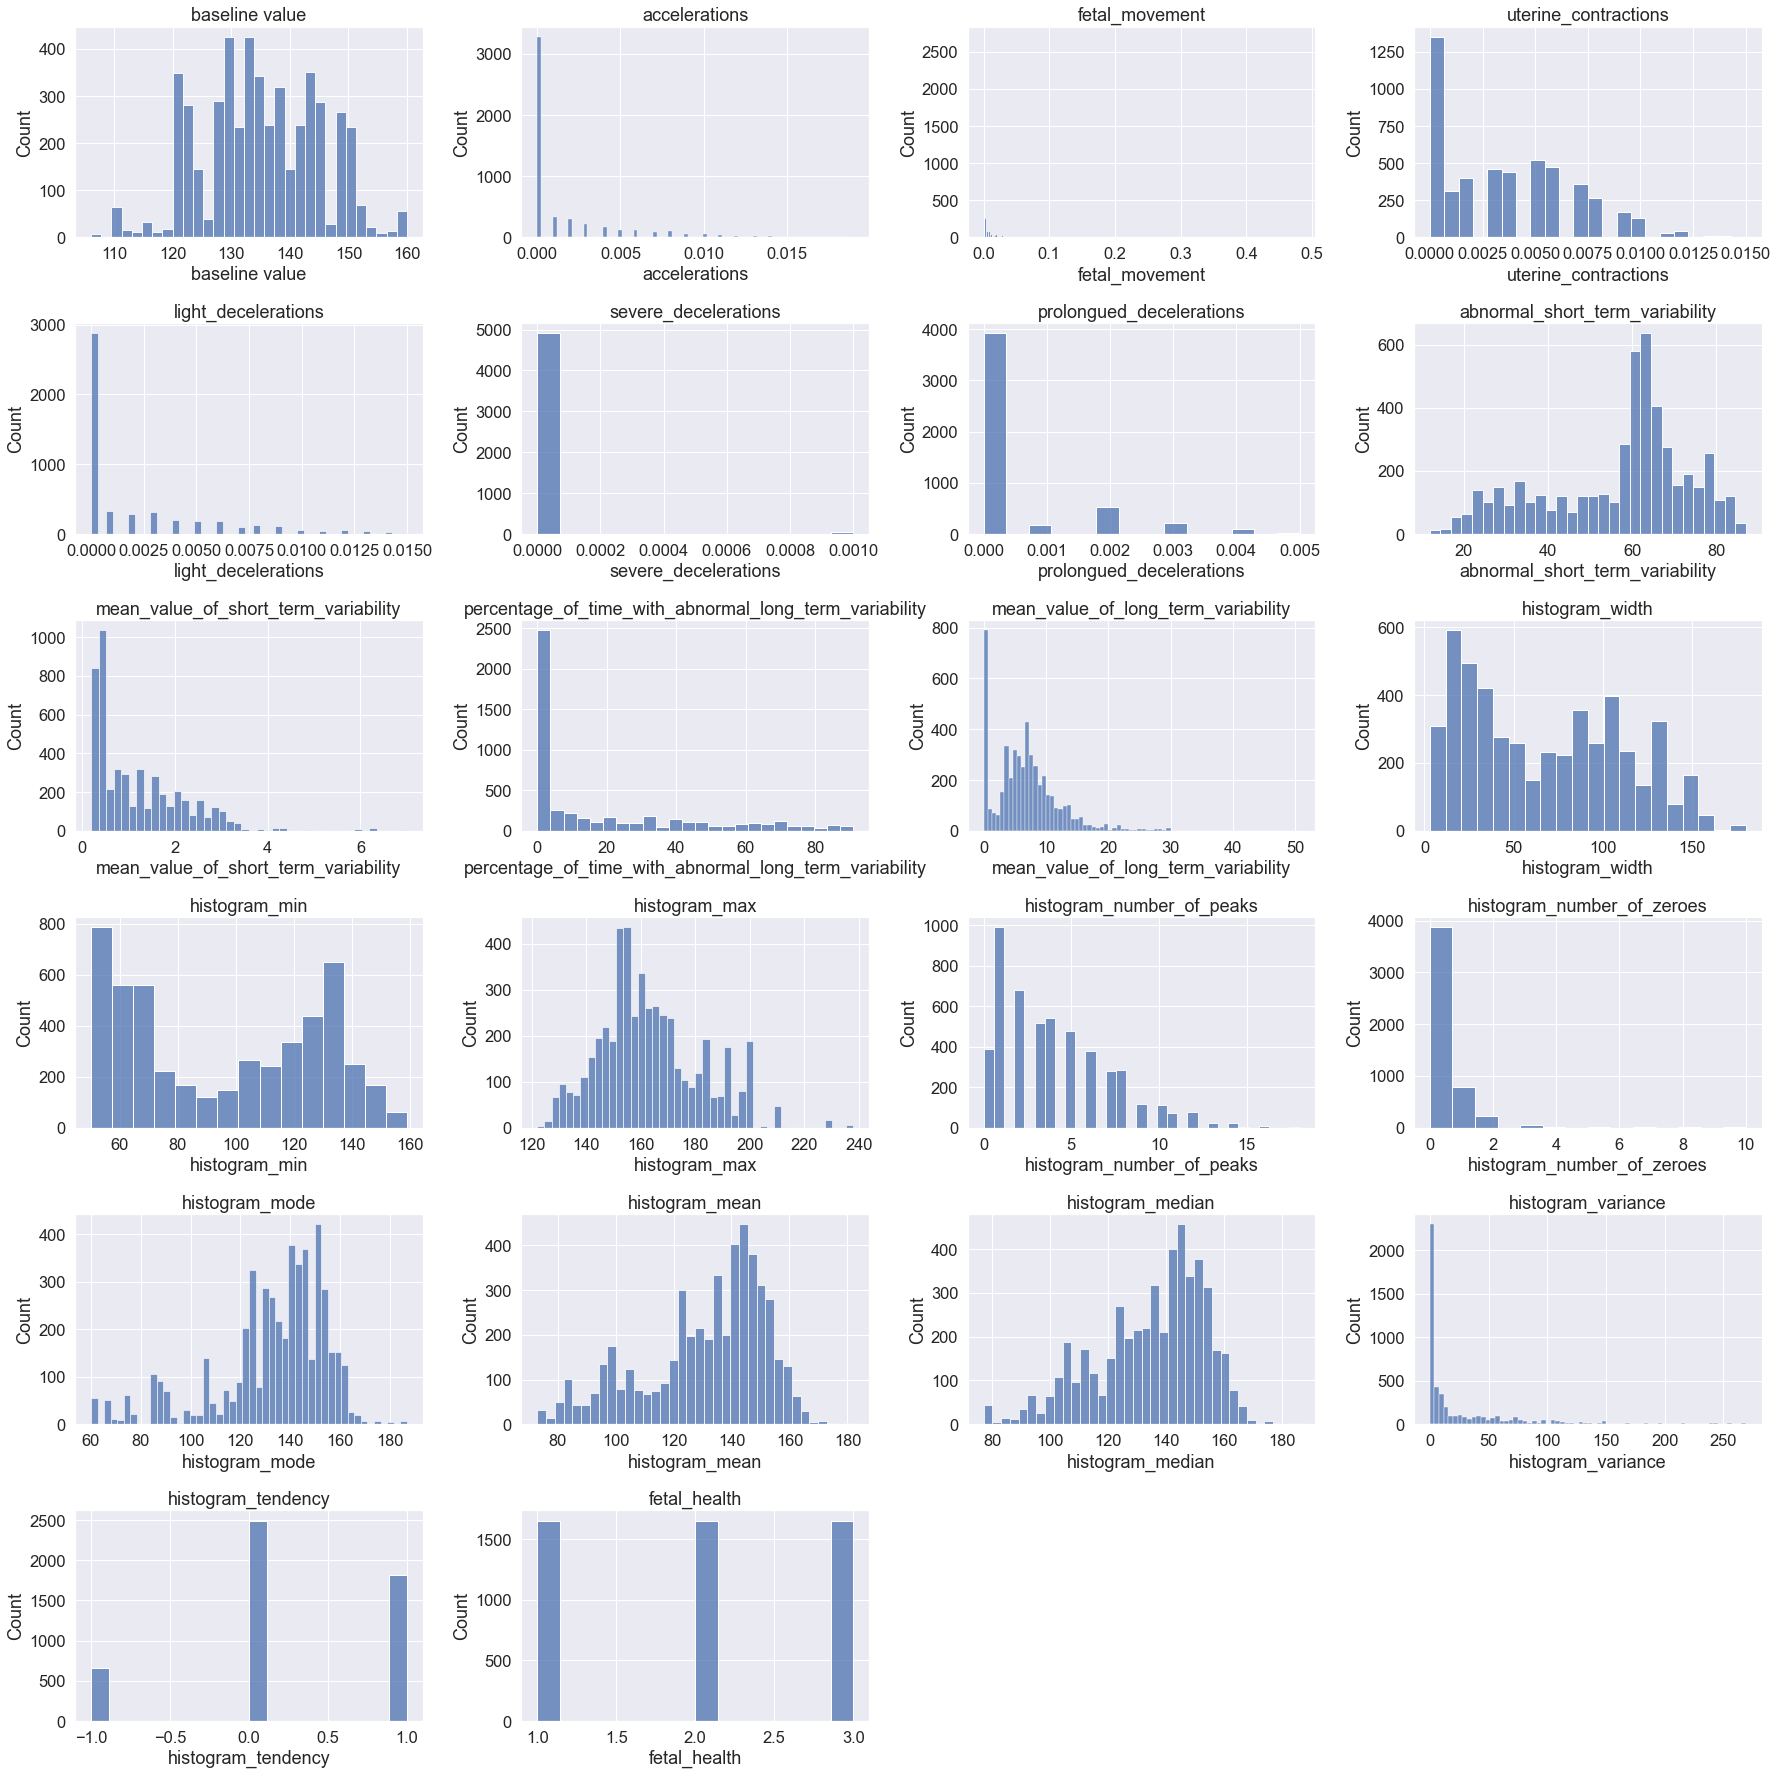

In [60]:
plt.figure(figsize=(25, 25))
for i, column in enumerate(p_upsampled.columns):
    plt.subplot(6, 4, i + 1)
    sns.histplot(data=p_upsampled[column])
    plt.title(column)

plt.tight_layout()
plt.show()

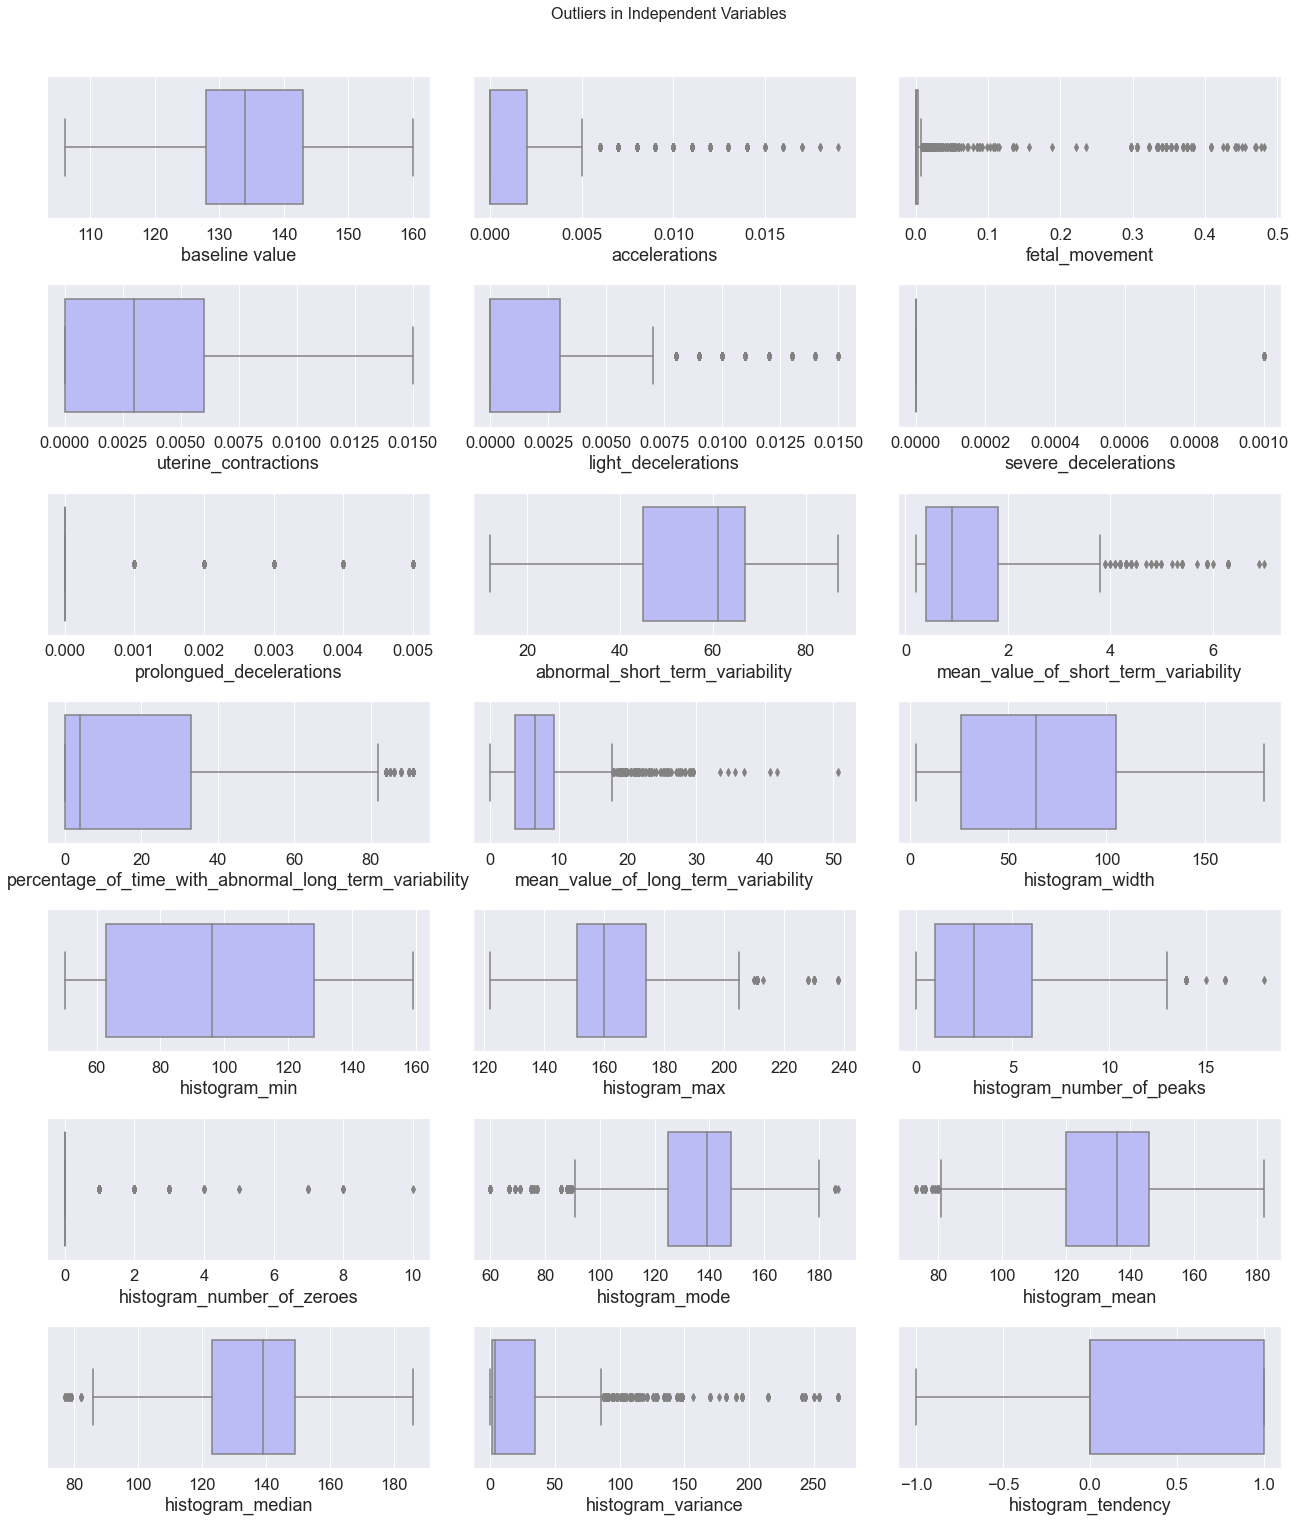

In [61]:
#outliers check?
plt.figure(figsize=(18,21))
for i,col in enumerate(p_upsampled.columns[:-1]):
    plt.subplot(7,3,i+1)
    sns.boxplot(x=p_upsampled[col], color='#b1b1ff')
plt.suptitle('Outliers in Independent Variables', size=16, y=1.01)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Fetal count')

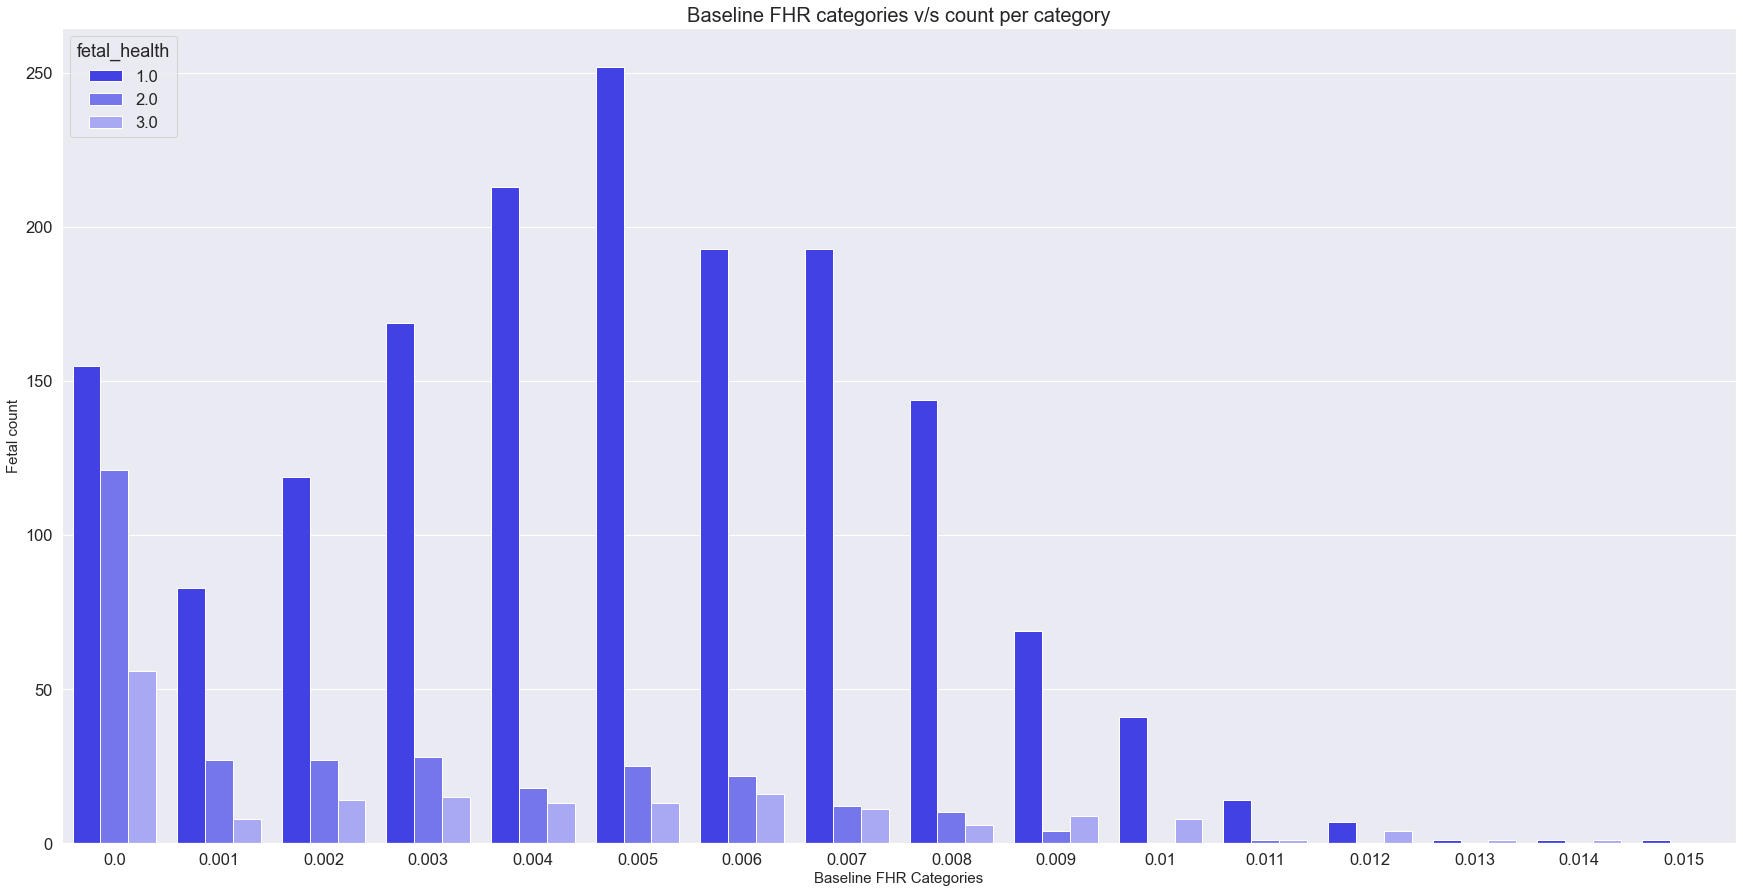

In [62]:
uterine_rounded = p['uterine_contractions']=p.uterine_contractions.round(3)

plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.countplot(data=p, x=uterine_rounded, hue='fetal_health',palette=['#2727ff','#6262ff','#9d9dff'])
plt.title('Baseline FHR categories v/s count per category', fontsize=20)
plt.xlabel('Baseline FHR Categories', fontsize=15)
plt.ylabel('Fetal count', fontsize=15)

Text(0, 0.5, 'Fetal count')

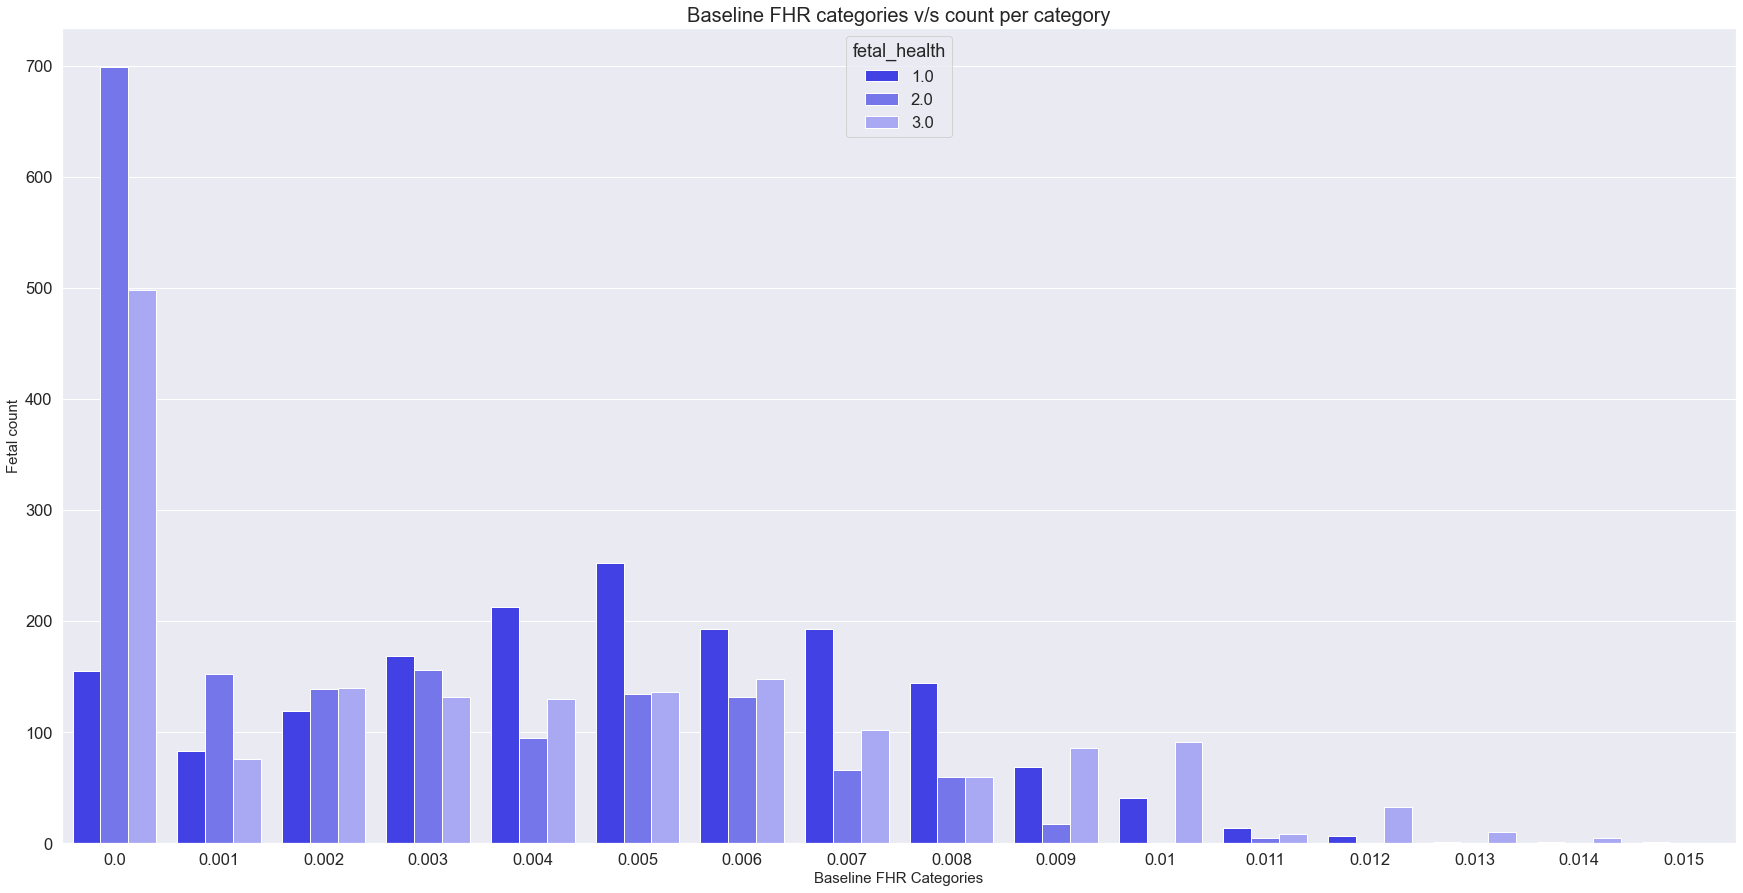

In [63]:
uterine_rounded_samp = p_upsampled['uterine_contractions']=p_upsampled.uterine_contractions.round(3)

plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.countplot(data=p_upsampled, x=uterine_rounded_samp, hue='fetal_health',palette=['#2727ff','#6262ff','#9d9dff'])
plt.title('Baseline FHR categories v/s count per category', fontsize=20)
plt.xlabel('Baseline FHR Categories', fontsize=15)
plt.ylabel('Fetal count', fontsize=15)

Text(0, 0.5, 'Fetal count')

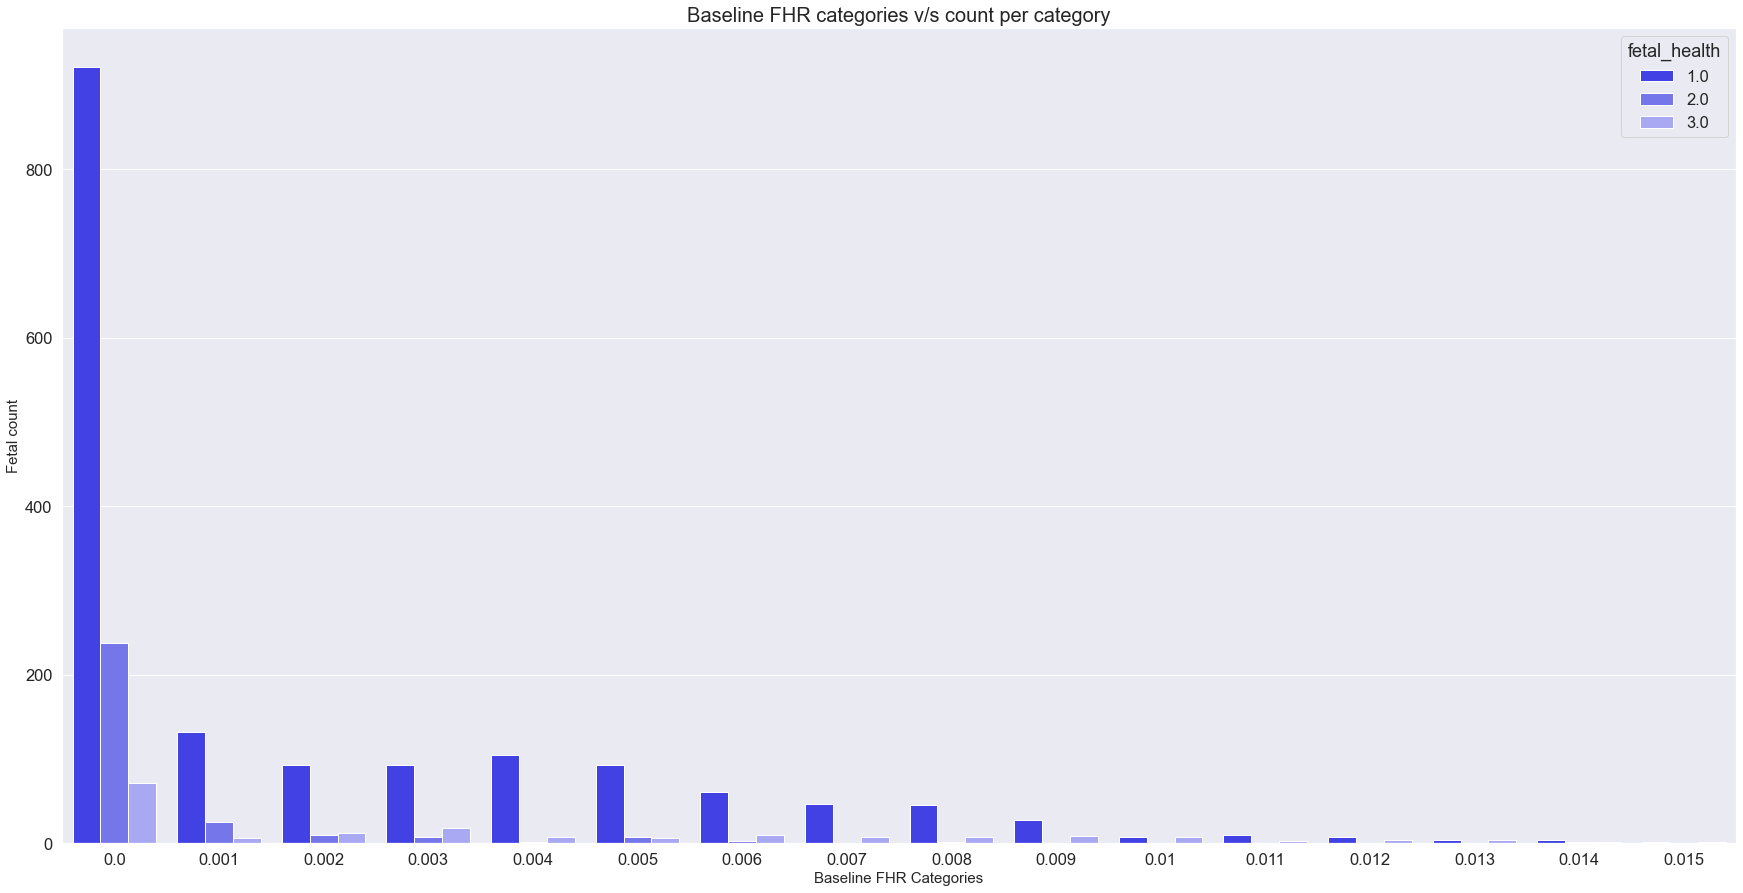

In [64]:
lightdecel_rounded = p['light_decelerations']=p.light_decelerations.round(3)

plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.countplot(data=p, x=lightdecel_rounded, hue='fetal_health',palette=['#2727ff','#6262ff','#9d9dff'])
plt.title('Baseline FHR categories v/s count per category', fontsize=20)
plt.xlabel('Baseline FHR Categories', fontsize=15)
plt.ylabel('Fetal count', fontsize=15)

Text(0, 0.5, 'Fetal count')

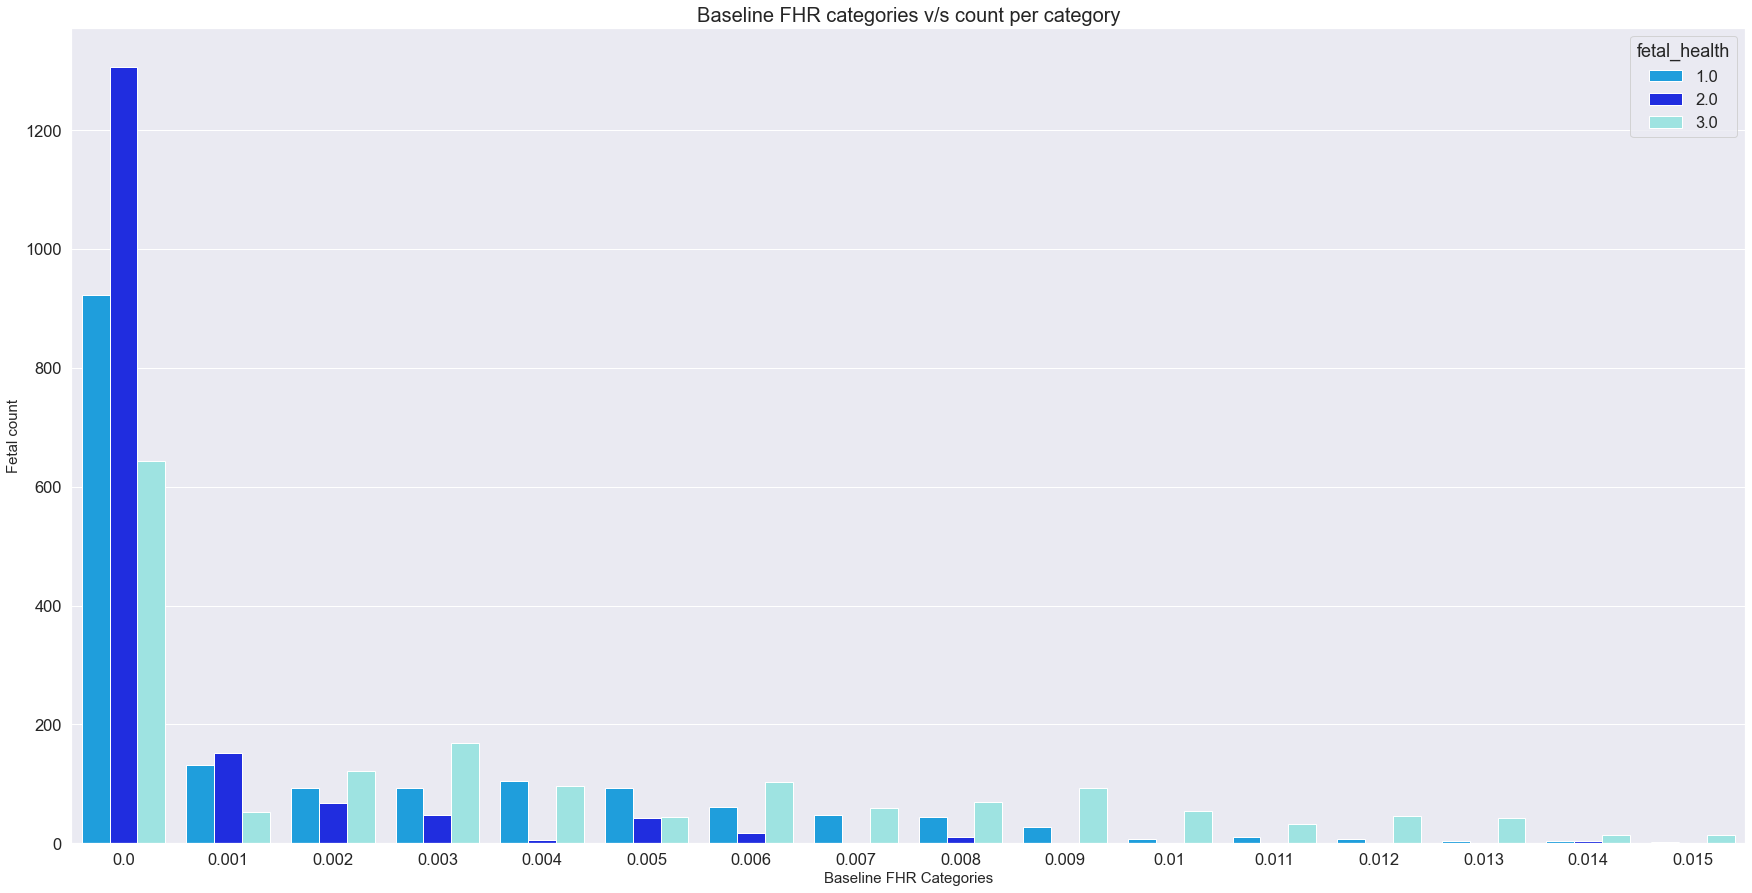

In [65]:
lightdecel_rounded_samp = p_upsampled['light_decelerations']=p_upsampled.light_decelerations.round(3)

plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.countplot(data=p_upsampled, x=lightdecel_rounded_samp, hue='fetal_health',palette=["#00a9fb","#0011ff", "#93eeec"])
plt.title('Baseline FHR categories v/s count per category', fontsize=20)
plt.xlabel('Baseline FHR Categories', fontsize=15)
plt.ylabel('Fetal count', fontsize=15)

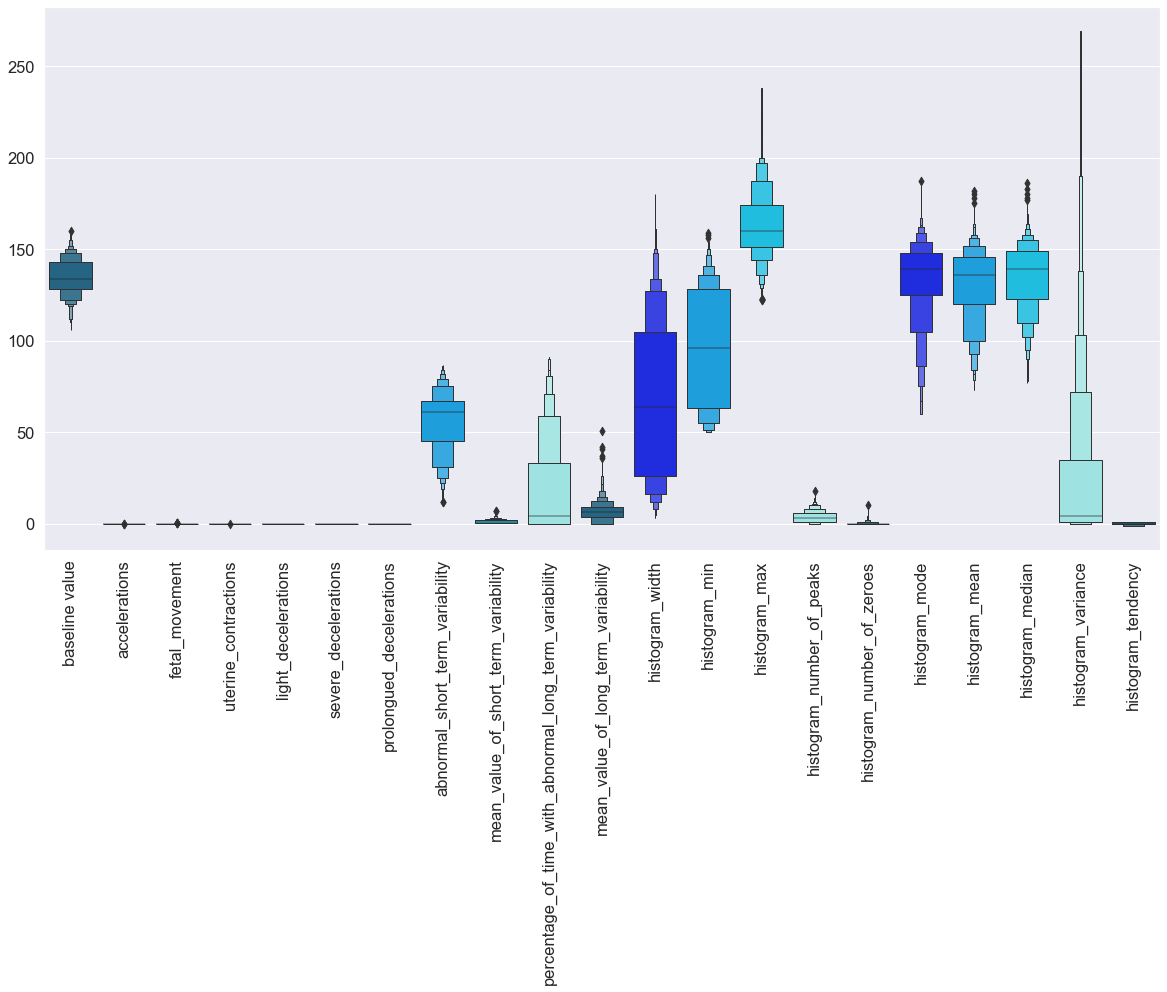

In [66]:
shades =["#156992","#0011ff","#00a9fb","#00d2ff", "#93eeec"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = p_upsampled.drop(["fetal_health"],axis=1),palette = shades)
plt.xticks(rotation=90)
plt.show()



C:\Users\ainaa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ainaa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


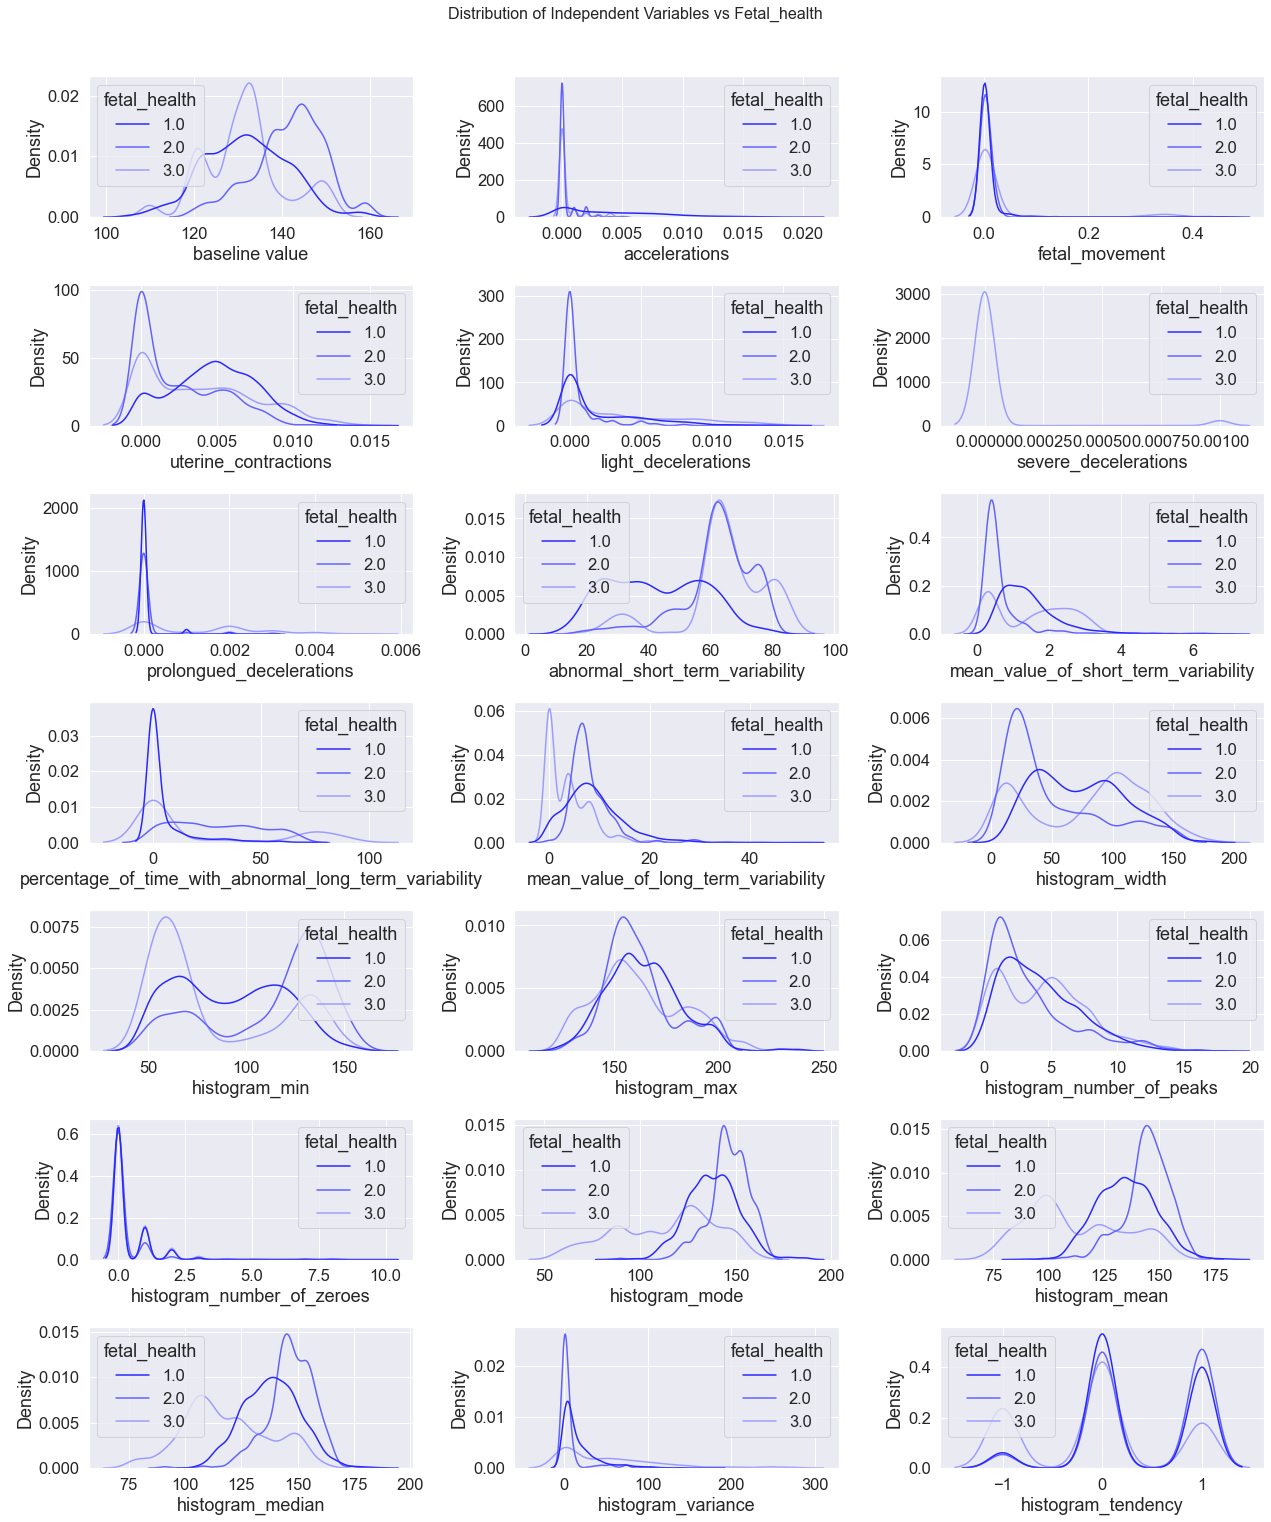

In [67]:
#change color to match color scheme
#maybe reduce 

plt.figure(figsize=(18,21))
for i,col in enumerate(p_upsampled.columns[:-1]):
    plt.subplot(7,3,i+1)
    sns.kdeplot(x=p_upsampled[col],hue=p_upsampled['fetal_health'],palette=['#2727ff','#6262ff','#9d9dff'])
plt.suptitle('Distribution of Independent Variables vs Fetal_health', size=16, y=1.01)
plt.tight_layout()
plt.show()

<Figure size 1152x576 with 0 Axes>

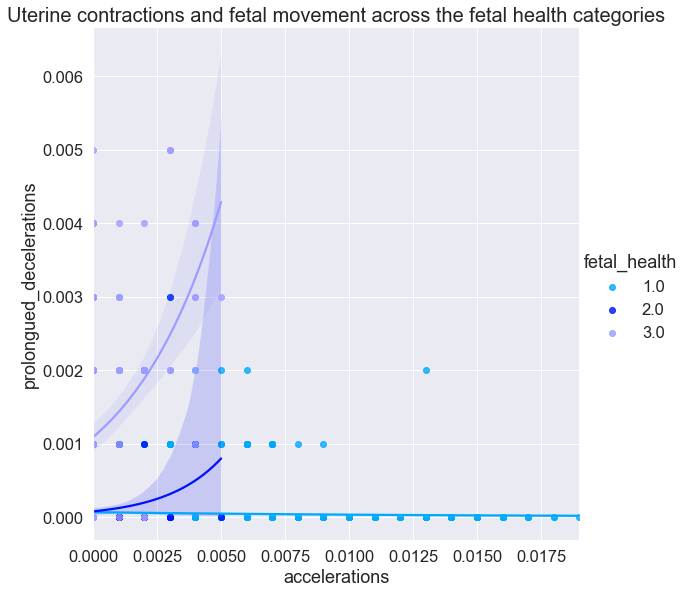

In [68]:
plt.figure(figsize=(16,8))
sns.lmplot(data=p, x="accelerations", y="prolongued_decelerations", 
           hue="fetal_health", aspect=1, height=8, logistic=True, palette=["#00a9fb","#0011ff", "#9d9dff"])
plt.title("Uterine contractions and fetal movement across the fetal health categories", fontsize=20);

In [69]:
#plt.figure(figsize=(16,8))
#sns.lmplot(data=p, x="accelerations", y="prolongued_decelerations", 
#           hue="fetal_health", aspect=1, height=8, logistic=True, palette=["#00a9fb","#0011ff", "#9d9dff"])
#plt.title("Uterine contractions and fetal movement across the fetal health categories", fontsize=20);

# Modeling

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier




#baseline value    
#accelerations -
#fetal_movement      
#uterine_contractions        
#light_decelerations        
#severe_decelerations         
#prolongued_decelerations -                   
#abnormal_short_term_variability -                           
#mean_value_of_short_term_variability                      
#percentage_of_time_with_abnormal_long_term_variability   
#mean_value_of_long_term_variability  -                     
#histogram_width                                           
#histogram_min                                             
#histogram_max                                            
#histogram_number_of_peaks                                 
#histogram_number_of_zeroes                                
#histogram_mode      -                                      
#histogram_mean     -                                 
#histogram_median   -                                 
#histogram_variance                                       
#histogram_tendency                            
#fetal_health 



#Xx = p.drop(["fetal_health"], axis=1)
Xx = p.drop(["baseline value","fetal_movement","light_decelerations",
       "uterine_contractions",
       "severe_decelerations", "percentage_of_time_with_abnormal_long_term_variability",
       "histogram_width","mean_value_of_short_term_variability",
       "histogram_min", "histogram_max","histogram_number_of_peaks",
       "histogram_number_of_zeroes", "histogram_variance", "histogram_tendency","fetal_health"], axis=1)
Yy = p["fetal_health"]

#[['accelerations','light_decelerations',
#        'prolongued_decelerations',
#       'abnormal_short_term_variability',
#      'percentage_of_time_with_abnormal_long_term_variability',
#       'mean_value_of_long_term_variability'
#     ]]

#assigning values to features as X and target as y
#X=p_upsampled.drop(["fetal_health"],axis=1)
X = p_upsampled.drop(["baseline value","fetal_movement","light_decelerations",
       "uterine_contractions",
       "severe_decelerations", "percentage_of_time_with_abnormal_long_term_variability",
       "histogram_width","mean_value_of_short_term_variability",
       "histogram_min", "histogram_max","histogram_number_of_peaks",
       "histogram_number_of_zeroes", "histogram_variance", "histogram_tendency", "fetal_health"], axis=1)
y=p_upsampled["fetal_health"]
X



accelerations  prolongued_decelerations  \
1             0.006                     0.000   
2             0.003                     0.000   
3             0.003                     0.000   
4             0.007                     0.000   
12            0.005                     0.000   
...             ...                       ...   
1348          0.000                     0.003   
597           0.000                     0.000   
1681          0.003                     0.002   
7             0.000                     0.000   
472           0.000                     0.000   

      abnormal_short_term_variability  mean_value_of_long_term_variability  \
1                                17.0                                 10.4   
2                                16.0                                 13.4   
3                                16.0                                 23.0   
4                                16.0                                 19.9   
12                               28.0                                 12.9   
...                               ...                                  ...   
1348                             34.0                                  3.6   
597                              77.0                                 10.2   
1681                             68.0                                  0.0   
7                                83.0                                 15.6   
472                              81.0                                  7.1   

      histogram_mode  histogram_mean  histogram_median  
1              141.0           136.0             140.0  
2              141.0           135.0             138.0  
3              137.0           134.0             137.0  
4              137.0           136.0             138.0  
12             135.0           134.0             137.0  
...              ...             ...               ...  
1348            75.0            98.0              86.0  
597            150.0           150.0             151.0  
1681            91.0            83.0              95.0  
7              122.0           122.0             123.0  
472            152.0           150.0             151.0  

[4965 rows x 7 columns]

In [71]:
#APPLYING STANDARD SCALAR 
sc=StandardScaler()

Xx = sc.fit_transform(Xx)
X=sc.fit_transform(X)

In [72]:
#change color to match color scheme
#maybe reduce 

#plt.figure(figsize=(18,21))
#for i,col in enumerate(X.columns):
#    plt.subplot(7,3,i+1)
#    sns.kdeplot(x=p_upsampled[col],hue=p_upsampled['fetal_health'],palette=["#00a9fb","#0011ff", "#9d9dff"])
#plt.suptitle('Distribution of Independent Variables vs Fetal_health', size=16, y=1.01)
#plt.tight_layout()
#plt.show()

In [73]:
#Set up a standard scaler for the features
#col_names = list(X.columns)
#s_scaler = preprocessing.StandardScaler()
#X_df= s_scaler.fit_transform(X)
#X_df = pd.DataFrame(X_df, columns=col_names)   
#X_df.describe().T

In [74]:
#looking at the scaled features
#plt.figure(figsize=(20,10))
#sns.boxenplot(data = X_df,palette = shades)
#plt.xticks(rotation=90)
#plt.show()

In [75]:
Xx

array([[-0.8223883 , -0.2687543 ,  1.51319018, ..., -1.06561383,
         0.15326971, -1.18164215],
       [ 0.73013282, -0.2687543 , -1.74475094, ...,  0.21663815,
         0.08912573,  0.13203796],
       [-0.04612774, -0.2687543 , -1.80292846, ...,  0.21663815,
         0.02498176, -0.00624416],
       ...,
       [-0.56363478, -0.2687543 ,  1.8622553 , ...,  0.94935356,
         0.85885344,  0.96173066],
       [-0.56363478, -0.2687543 ,  1.80407778, ...,  0.88829395,
         0.79470947,  0.8925896 ],
       [-0.30488126, -0.2687543 ,  1.5713677 , ...,  0.46087662,
         0.53813356,  0.47774325]])

In [76]:
from sklearn.model_selection import train_test_split

#x_train,x_test,y_train,y_test=train_test_split(Xx,Yy,test_size=0.3,random_state=42) # going to have to do these in separate boxes so they don't contradict with each other. 


target = p_upsampled['fetal_health']
#spliting test and training sets 70/30
#X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,stratify = target, random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [77]:
#model 1a linear Regression - upsampled data


model = LogisticRegression(solver='liblinear').fit(x_train,y_train)
y_predict=model.predict(x_test)
tiff = model.predict_proba(x_test)
display(model.score(x_test,y_test))
 #this is the predicted values
y_predict

0.8060402684563759

array([2., 1., 2., ..., 1., 3., 2.])

In [78]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         1.0       0.91      0.80      0.85       531
         2.0       0.71      0.83      0.77       474
         3.0       0.81      0.79      0.80       485

    accuracy                           0.81      1490
   macro avg       0.81      0.81      0.81      1490
weighted avg       0.82      0.81      0.81      1490



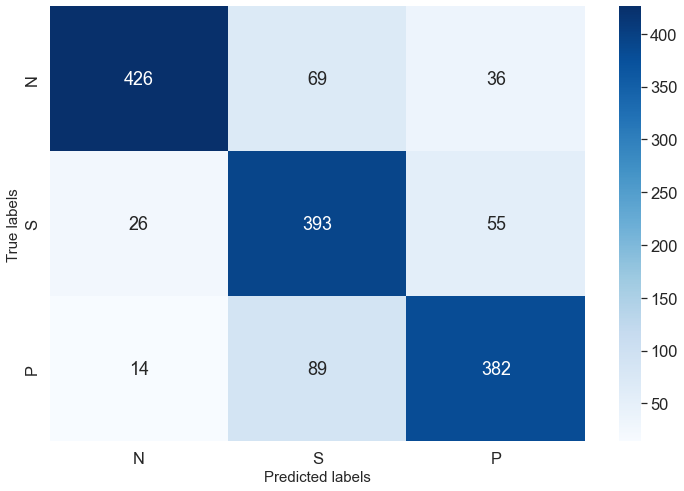

In [79]:
x_axis_labels = ['N', 'S', 'P']
y_axis_labels = x_axis_labels
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot = True, cmap="Blues", fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted labels', fontsize=15)
plt.ylabel('True labels', fontsize=15)
plt.show()      



<AxesSubplot:>

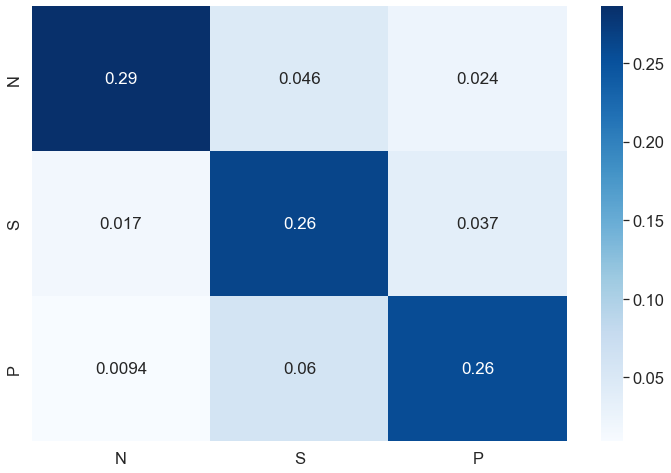

In [80]:
#plotConfusionMatrix(ytest,y_predict,classes = np.array(['N','S','P']),width = 1.5,cmap = plt.cm.binary)


plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap="Blues",annot = True, annot_kws = {'size':17},xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [81]:
#plt.subplots(figsize=(12,8))
#cf_matrix = confusion_matrix(y_test, y_predict)
#sns.heatmap(cf_matrix, annot = True, cmap="Blues", fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
#plt.xlabel('Predicted labels', fontsize=15)
#plt.ylabel('True labels', fontsize=15)
#plt.show() 

In [82]:
#shades =["#156992","#0011ff","#00a9fb","#00d2ff", "#93eeec"]
#plt.figure(figsize=(20,10))
#sns.boxenplot(data = X,palette = shades)
#plt.xticks(rotation=90)
#plt.show()

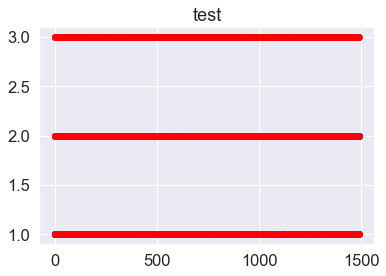

In [83]:
import matplotlib.pyplot as plt
#plt.plot(y_predict)
#plt.plot(y_test)

#plt.show()


def plotGraph(y_test,y_predict,regressorName):
    if max(y_test) >= max(y_predict):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_predict))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_predict)), y_predict, color='red')
    plt.title(regressorName)
    plt.show()
    return


plotGraph(y_test, y_predict, "test")

In [84]:
#plotConfusionMatrix(y_test,y_predict,classes = np.array(['N','S','P']),width = 1.5,cmap = plt.cm.binary)

In [85]:
tiff

array([[3.13445479e-01, 5.60837424e-01, 1.25717097e-01],
       [9.96145309e-01, 3.84763998e-03, 7.05101492e-06],
       [3.94415653e-01, 5.84534649e-01, 2.10496975e-02],
       ...,
       [9.91328412e-01, 8.26190053e-03, 4.09687184e-04],
       [7.81925636e-04, 3.75656148e-01, 6.23561926e-01],
       [6.33257710e-02, 7.34823367e-01, 2.01850862e-01]])

<AxesSubplot:xlabel='Actual', ylabel='Count'>

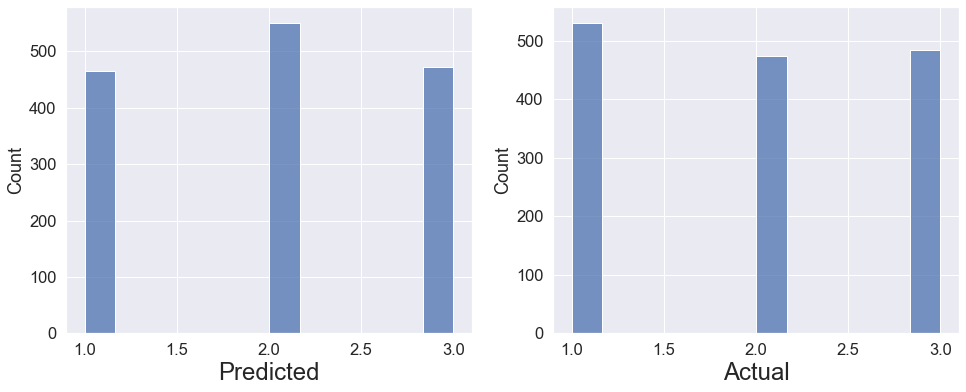

In [86]:
# fig, ax =plt.subplots(1,2,figsize=(25,35)) 
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.set_xlabel('Predicted',fontsize=24)
sns.histplot(y_predict,ax=ax1)
ax2.set_xlabel('Actual',fontsize=24)
sns.histplot(y_test,ax=ax2)



#import matplotlib.pyplot as plt
#plt.plot(x_train['accelerations'])
#plt.ylabel('some numbers')
#plt.show()

In [87]:
#sns.lineplot(y_predict)

In [88]:
#model 2a Random Forest
#n_estimators=100
#max_depth=4 with 85% accuracy

model2 = RandomForestClassifier(criterion = 'gini',n_estimators=150,max_depth=12,random_state=33) #criterion can be also : entropy 
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
y_pred_prob = model2.predict_proba(x_test)
display(model2.score(x_test, y_test))
y_pred


0.961744966442953

array([2., 1., 1., ..., 1., 2., 2.])

In [89]:
y_pred_prob

array([[3.56431095e-02, 9.35706069e-01, 2.86508214e-02],
       [9.99259259e-01, 7.40740741e-04, 0.00000000e+00],
       [6.05370341e-01, 3.92999263e-01, 1.63039586e-03],
       ...,
       [9.86666667e-01, 6.66666667e-03, 6.66666667e-03],
       [2.88942905e-02, 9.63121668e-01, 7.98404152e-03],
       [7.37145607e-02, 8.77657104e-01, 4.86283355e-02]])

<AxesSubplot:xlabel='Actual', ylabel='Count'>

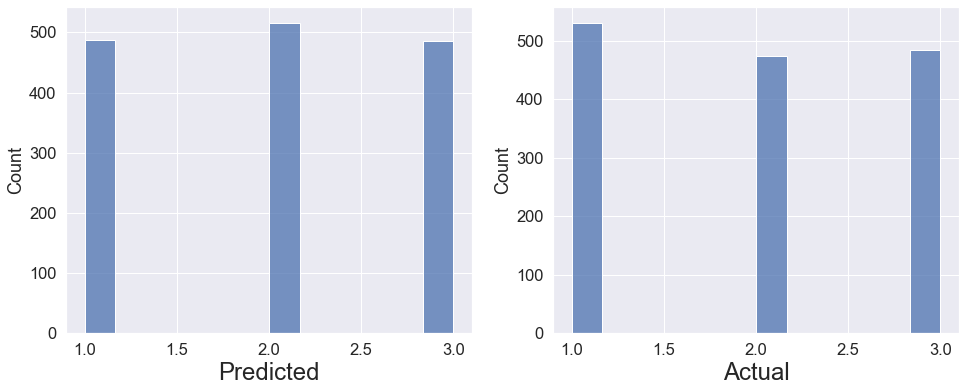

In [90]:
# fig, ax =plt.subplots(1,2,figsize=(25,35)) 
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.set_xlabel('Predicted',fontsize=24)
sns.histplot(y_pred,ax=ax1)
ax2.set_xlabel('Actual',fontsize=24)
sns.histplot(y_test,ax=ax2)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.99      0.91      0.95       531
         2.0       0.91      0.99      0.95       474
         3.0       0.99      0.99      0.99       485

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490



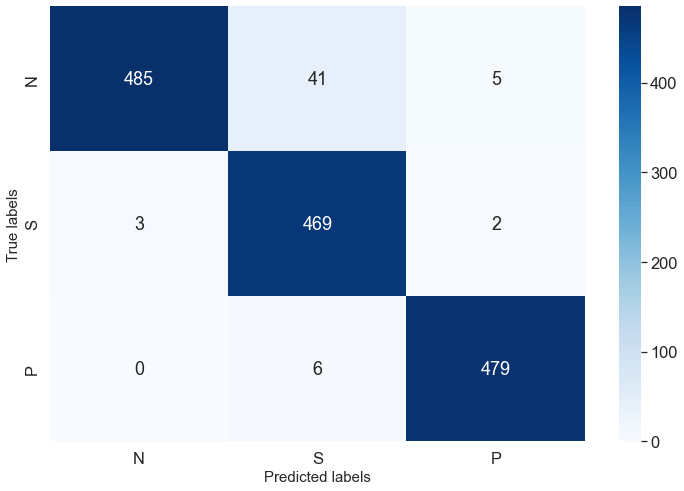

<AxesSubplot:>

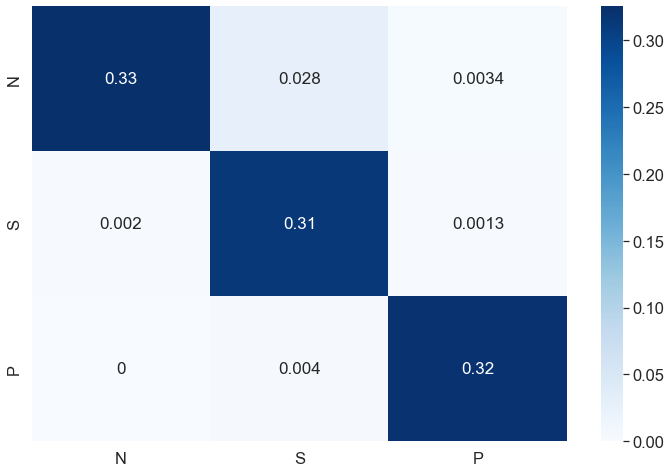

In [92]:
#Random Forest Confusion Matrix
#x_axis_labels = ['N', 'S', 'P']
#y_axis_labels = x_axis_labels
#cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, cmap="Blues", fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted labels', fontsize=15)
plt.ylabel('True labels', fontsize=15)
plt.show()      


#plotConfusionMatrix(ytest,y_predict,classes = np.array(['N','S','P']),width = 1.5,cmap = plt.cm.binary)


plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap="Blues",annot = True, annot_kws = {'size':17},xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [93]:
#model 3 Decision Tree

model3 = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=33) #criterion can be entropy
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)
y_pred_prob = model3.predict_proba(x_test)
display(model3.score(x_test, y_test))
y_pred3


0.723489932885906

array([2., 1., 1., ..., 1., 2., 2.])

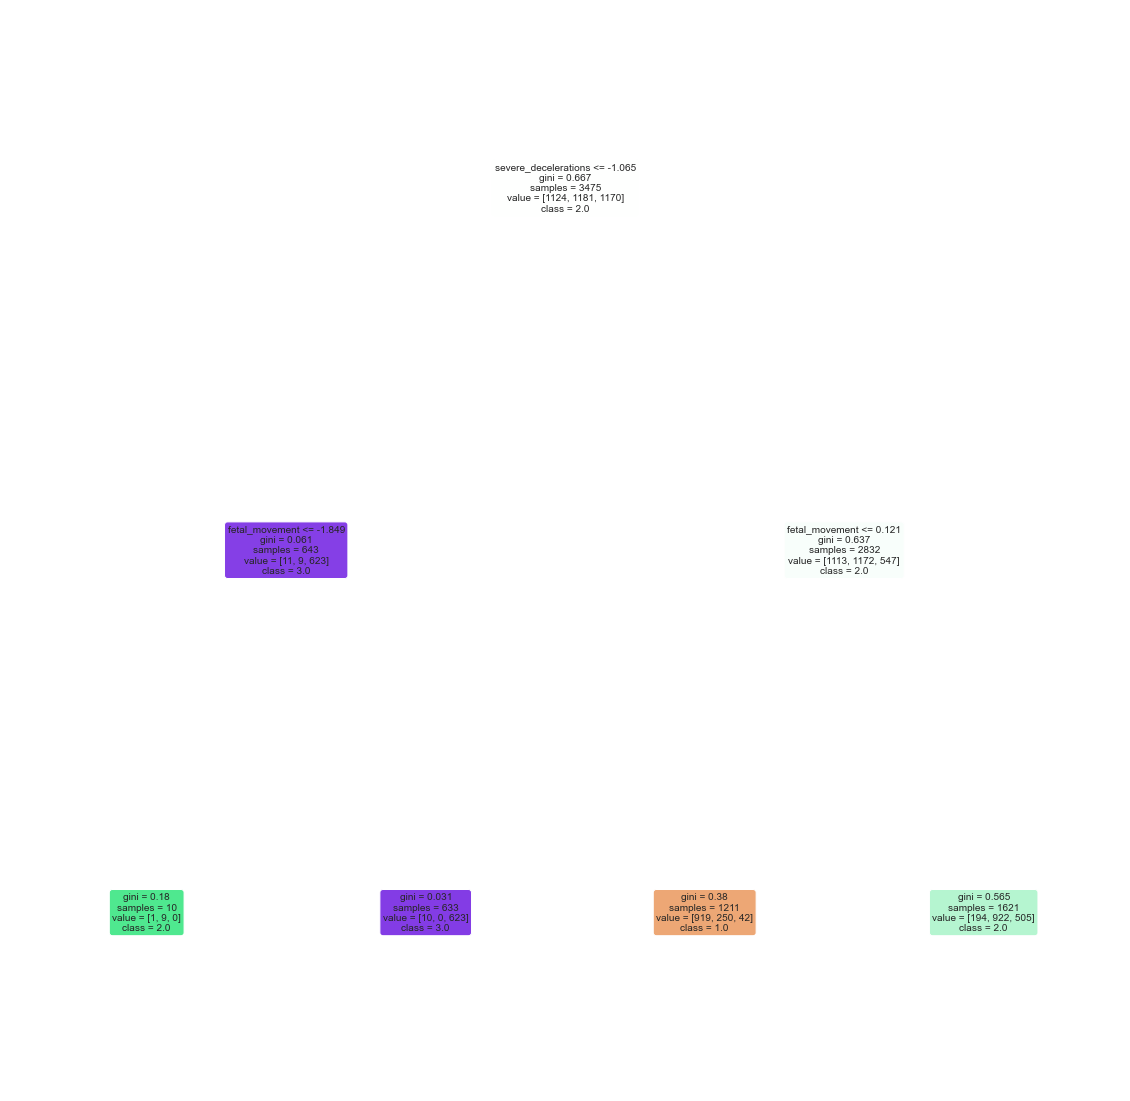

In [94]:
import matplotlib as plt
from platform import python_version
import sklearn
from sklearn import tree
import numpy as np

#tree design
tree_model3 = tree.DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=33).fit(x_train,y_train)
##sorted labels for plot
sorted = list(map(str, np.sort(y_test.unique())))

#setup figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

features = ["vaseline value","accelerations","fetal_movement","uterine_contractions","light_decelerations","severe_decelerations","prolongued_decelerations","abnormal_short_term_variability", "mean_value_of_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","mean_value_of_long_term_variability", "histogram_width","histogram_min","histogram_max","histogram_number_of_peaks","histogram_number_of_zeroes","histogram_mode","histogram_mean","histogram_median","histogram_variance","histogram_tendency"]

#x = tree.plot_tree
x = tree.plot_tree(tree_model3,rounded=True,filled=True,class_names=sorted,feature_names=features, fontsize = 10)



In [95]:
y_pred_prob

array([[0.11967921, 0.5687847 , 0.31153609],
       [0.75887696, 0.20644096, 0.03468208],
       [0.75887696, 0.20644096, 0.03468208],
       ...,
       [0.75887696, 0.20644096, 0.03468208],
       [0.11967921, 0.5687847 , 0.31153609],
       [0.11967921, 0.5687847 , 0.31153609]])

In [96]:
#plotConfusionMatrix(y_test,y_pred_prob,classes = np.array(['N','S','P']),width = 1.5,cmap = plt.cm.binary)

In [97]:
#### ROC CURVE TO EVALUATE THE MODEL PERFORMANCE


In [98]:
prob_sum = np.sum(tiff, 1)
prob_sum.size

1490

In [99]:
pos_proba = tiff[:,1]


In [100]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         1.0       0.78      0.82      0.80       531
         2.0       0.56      0.77      0.65       474
         3.0       1.00      0.57      0.72       485

    accuracy                           0.72      1490
   macro avg       0.78      0.72      0.72      1490
weighted avg       0.78      0.72      0.73      1490



<AxesSubplot:>

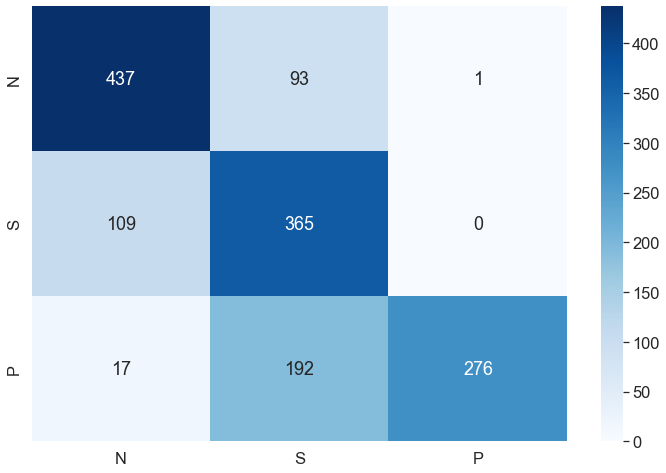

In [101]:
import matplotlib
#Decision Tree Confusion Matrix
x_axis_labels = ['N', 'S', 'P']
y_axis_labels = x_axis_labels
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
cf_matrix = confusion_matrix(y_test, y_pred3)
sns.heatmap(cf_matrix, annot = True, cmap="Blues", fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
#plt.xlabel('Predicted labels', fontsize=15)
#plt.ylabel('True labels', fontsize=15)
#plt.show()      


#plotConfusionMatrix(ytest,y_predict,classes = np.array(['N','S','P']),width = 1.5,cmap = plt.cm.binary)


<AxesSubplot:>

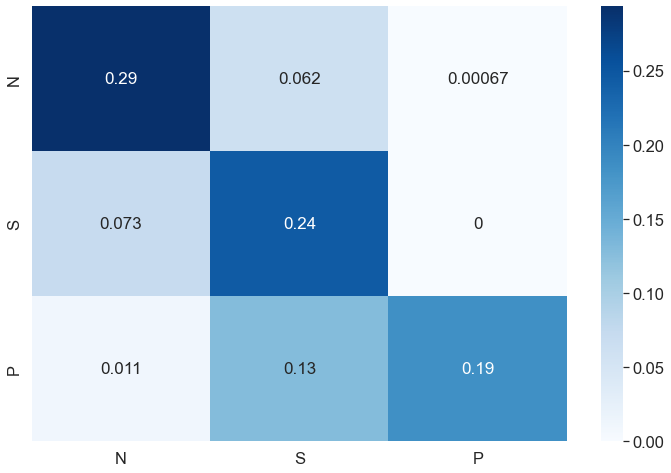

In [102]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
cf_matrix = confusion_matrix(y_test, y_pred3)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap="Blues",annot = True, annot_kws = {'size':17},xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [103]:
# fig, ax =plt.subplots(1,2,figsize=(25,35)) 
#fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
#ax1.set_xlabel('Predicted',fontsize=24)
#sns.histplot(y_pred3,ax=ax1)
#ax2.set_xlabel('Actual',fontsize=24)
#sns.histplot(y_test,ax=ax2)

In [104]:
#model 1b Linear Regression - original data

x_train, x_test, y_train, y_test = train_test_split(Xx,Yy,test_size=0.3, random_state=42)


model1b = LogisticRegression(solver='liblinear').fit(x_train,y_train)
y_predict1b = model1b.predict(x_test)
tiff2 = model1b.predict_proba(x_test)
display(model1b.score(x_test,y_test))

y_predict1b

0.8620689655172413

array([1., 1., 1., 1., 3., 2., 1., 3., 1., 2., 1., 3., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 2., 1., 1., 2., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2.,
       1., 1., 2., 1., 1., 1., 3., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 3., 2., 2., 1., 3., 1., 1., 3., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [105]:

#model 2b - Random Forest - original data 


model2b = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=4,random_state=33) #criterion can be also : entropy 
model2b.fit(x_train, y_train)
y_pred2b = model2b.predict(x_test)
y_pred_prob2b = model2b.predict_proba(x_test)
display(model2b.score(x_test, y_test))
y_pred2b

0.8808777429467085

array([1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 3., 3., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 3., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [106]:
#model 3b Decision Tree - original data

model3b = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=33) #criterion can be entropy
model3b.fit(x_train, y_train)

y_pred3b = model3b.predict(x_test)
y_pred_probb = model3b.predict_proba(x_test)
display(model3b.score(x_test, y_test))
y_pred3b

0.8025078369905956

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 3., 3., 1., 1., 1., 3., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# Predictions

#model


# conclusion